<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2301-2350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3237]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [3238]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

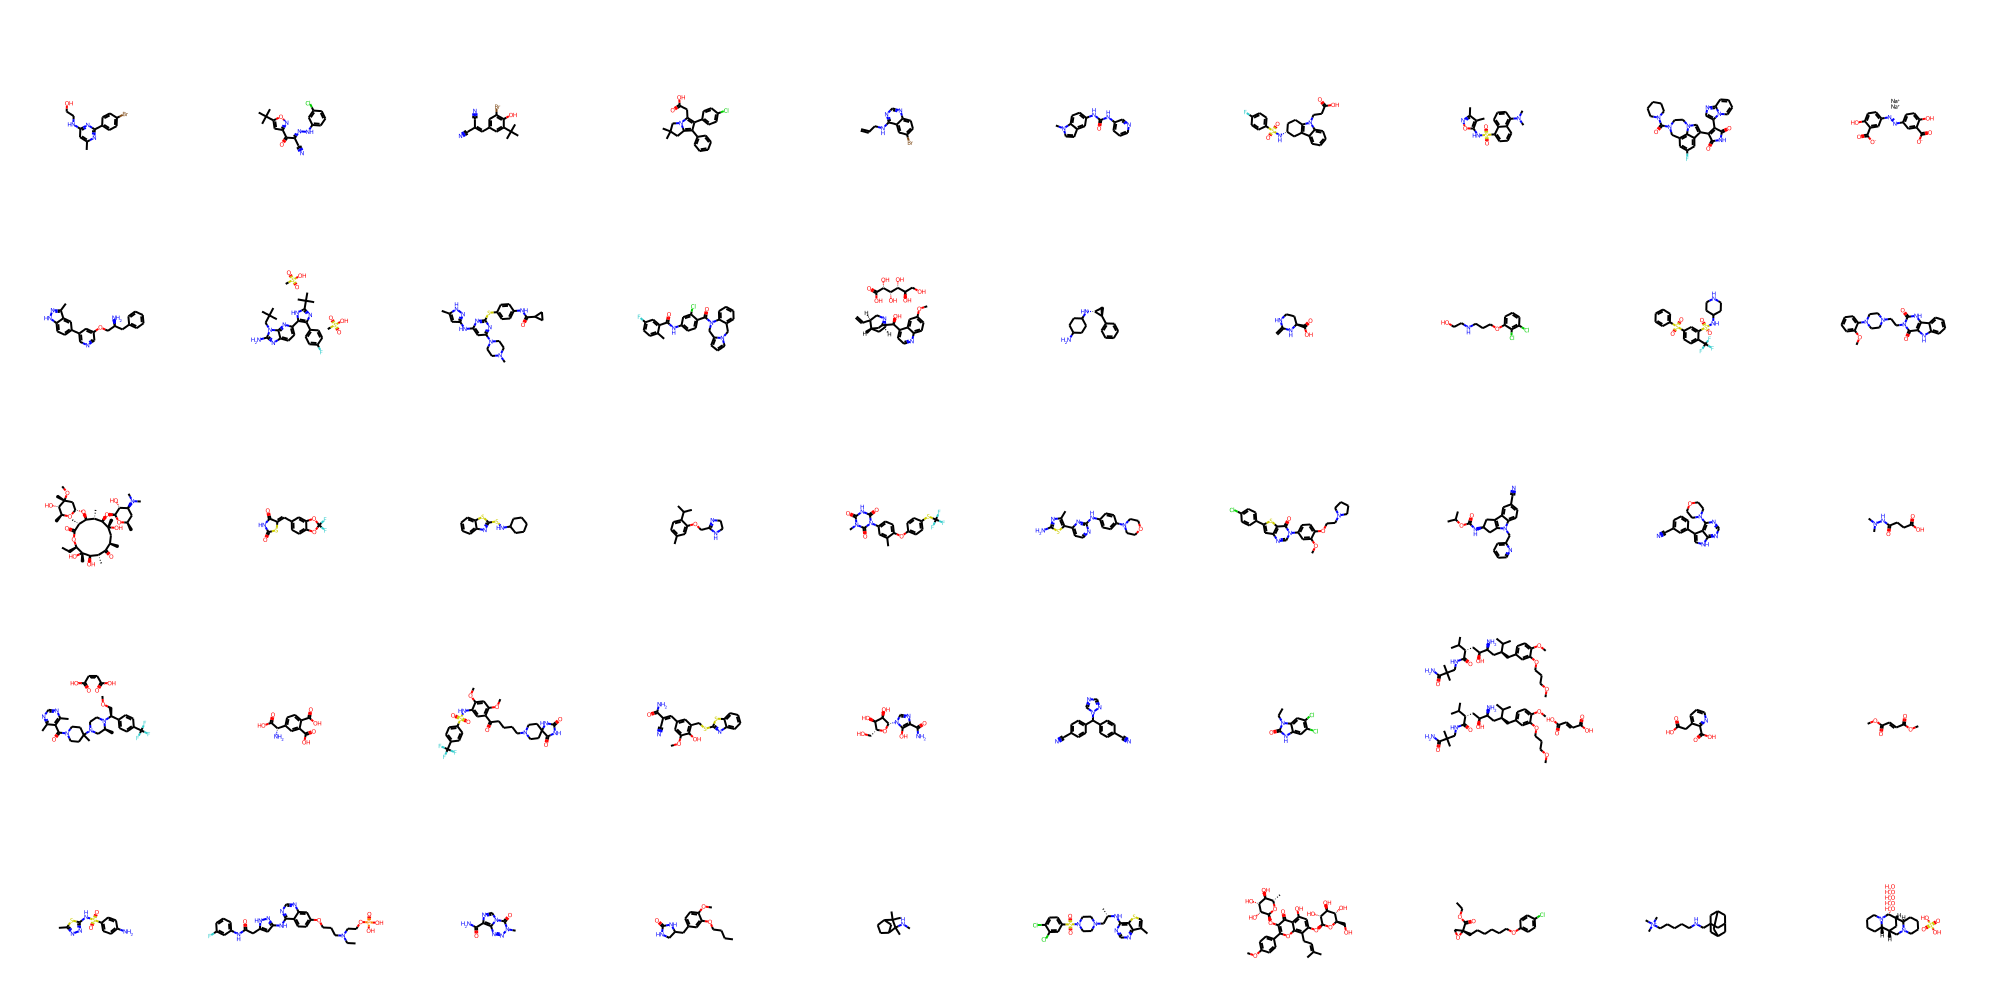

In [3239]:
smiles_list = [

'Cc1cc(NCCO)nc(-c2ccc(Br)cc2)n1',
'CC(C)(C)c1cc(C(=O)/C(C#N)=N/Nc2cccc(Cl)c2)no1',
'CC(C)(C)c1cc(C=C(C#N)C#N)cc(Br)c1O',
'CC1(C)Cc2c(-c3ccccc3)c(-c3ccc(Cl)cc3)c(CC(=O)O)n2C1',
'C=CCNc1ncnc2ccc(Br)cc12',
'Cn1ccc2cc(NC(=O)Nc3cccnc3)ccc21',
'O=C(O)CCn1c2c(c3ccccc31)C[C@H](NS(=O)(=O)c1ccc(F)cc1)CC2',
'Cc1noc(NS(=O)(=O)c2cccc3c(N(C)C)cccc23)c1C',
'O=C1NC(=O)C(c2cnc3ccccn23)=C1c1cn2c3c(cc(F)cc13)CN(C(=O)N1CCCCC1)CC2',
'O=C([O-])c1cc(/N=N/c2ccc(O)c(C(=O)[O-])c2)ccc1O.[Na+].[Na+]',
'Cc1n[nH]c2ccc(-c3cncc(OC[C@@H](N)Cc4ccccc4)c3)cc12',
'CC(C)(C)Cn1c(N)nc2ccc(-c3[nH]c(C(C)(C)C)nc3-c3ccc(F)cc3)nc21.CS(=O)(=O)O.CS(=O)(=O)O',
'Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)cc3)n2)n[nH]1',
'Cc1ccc(F)cc1C(=O)Nc1ccc(C(=O)N2Cc3cccn3Cc3ccccc32)c(Cl)c1',
'C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2ccc(OC)cc12.O=C(O)[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO',
'NC1CCC(N[C@@H]2C[C@H]2c2ccccc2)CC1',
'C=C1NCC[C@@H](C(=O)O)N1',
'OCCNCCCOc1cccc(Cl)c1Cl',
'O=S(=O)(NC1CCNCC1)c1cc(S(=O)(=O)c2ccccc2)ccc1C(F)(F)F',
'COc1ccccc1N1CCN(CCn2c(=O)[nH]c3c([nH]c4ccccc43)c2=O)CC1',
'CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@H](N(C)C)[C@H]2O)[C@](C)(O)C[C@@H](C)C(=O)[C@H](C)[C@@H](O)[C@]1(C)O',
'O=C1NC(=O)/C(=C/c2ccc3c(c2)OC(F)(F)O3)S1',
'c1ccc2sc(SNC3CCCCC3)nc2c1',
'Cc1ccc(C(C)C)c(OCC2=NCCN2)c1',
'Cc1cc(-n2c(=O)[nH]c(=O)n(C)c2=O)ccc1Oc1ccc(SC(F)(F)F)cc1',
'Cc1nc(N)sc1-c1ccnc(Nc2ccc(N3CCOCC3)cc2)n1',
'COc1cc(-n2cnc3cc(-c4ccc(Cl)cc4)sc3c2=O)ccc1OCCN1CCCC1',
'CC(C)OC(=O)N[C@H]1Cc2c(n(Cc3ccccn3)c3ccc(C#N)cc23)C1',
'N#Cc1cccc(-c2c[nH]c3ncnc(N4CCOCC4)c23)c1',
'CN(C)NC(=O)CCC(=O)O',
'COC[C@@H](c1ccc(C(F)(F)F)cc1)N1CCN(C2(C)CCN(C(=O)c3c(C)ncnc3C)CC2)C[C@@H]1C.O=C(O)/C=C\C(=O)O',
'N[C@H](C(=O)O)c1ccc(C(=O)O)c(C(=O)O)c1',
'COc1cc(OC)c(C(=O)CCCCN2CCC3(CC2)NC(=O)NC3=O)cc1NS(=O)(=O)c1ccc(C(F)(F)F)cc1',
'COc1cc(/C=C(\C#N)C(N)=O)cc(CSc2nc3ccccc3s2)c1O',
'NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c1O',
'N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1',
'CCn1c(=O)[nH]c2cc(Cl)c(Cl)cc21',
'COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@H](C(=O)NCC(C)(C)C(N)=O)C(C)C)C(C)C)ccc1OC.COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@H](C(=O)NCC(C)(C)C(N)=O)C(C)C)C(C)C)ccc1OC.O=C(O)/C=C/C(=O)O',
'O=C(O)Cc1cccnc1C(=O)O',
'COC(=O)/C=C/C(=O)OC',
'Cc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1',
'CCN(CCCOc1ccc2c(Nc3cc(CC(=O)Nc4cccc(F)c4)[nH]n3)ncnc2c1)CCOP(=O)(O)O',
'Cn1nnc2c(C(N)=O)ncn2c1=O',
'CCCCOc1cc(CC2CNC(=O)N2)ccc1OC',
'CNC1(C)C2CCC(C2)C1(C)C',
'Cc1csc2c(N[C@@H](C)CN3CCN(S(=O)(=O)c4ccc(Cl)c(Cl)c4)CC3)ncnc12',
'COc1ccc(-c2oc3c(CC=C(C)C)c(O[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O)cc(O)c3c(=O)c2O[C@@H]2O[C@@H](C)[C@H](O)[C@@H](O)[C@H]2O)cc1',
'CCOC(=O)[C@@]1(CCCCCCOc2ccc(Cl)cc2)CO1',
'C[N+](C)(C)CCCCCNCC12CC3CC(CC(C3)C1)C2',
'C1CCN2C[C@H]3C[C@H](CN4CCCC[C@H]34)[C@@H]2C1.O.O.O.O.O.O=S(=O)(O)O',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



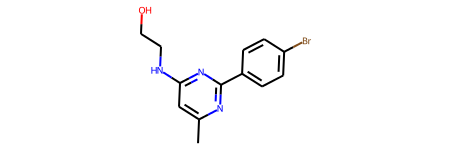

In [3240]:
M1 = mol_list [0]
M1

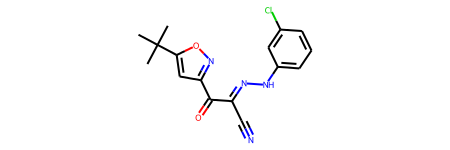

In [3241]:
M2 = mol_list [1]
M2

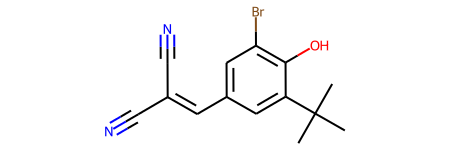

In [3242]:
M3 = mol_list [2]
M3

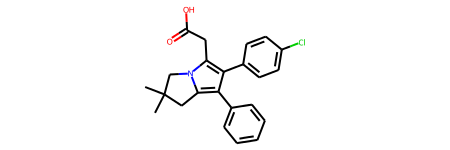

In [3243]:
M4 = mol_list [3]
M4

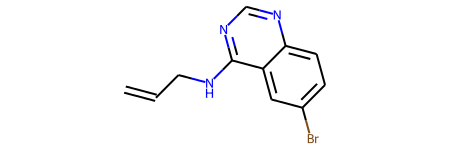

In [3244]:
M5 = mol_list [4]
M5

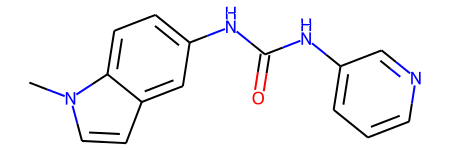

In [3245]:
M6 = mol_list [5]
M6

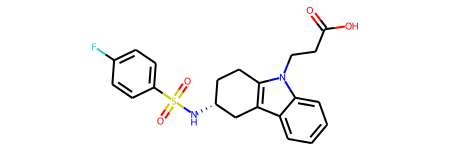

In [3246]:
M7 = mol_list [6]
M7

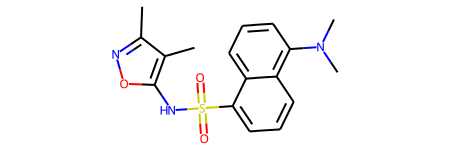

In [3247]:
M8 = mol_list [7]
M8

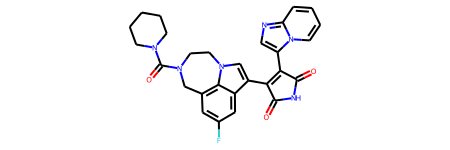

In [3248]:
M9 = mol_list [8]
M9

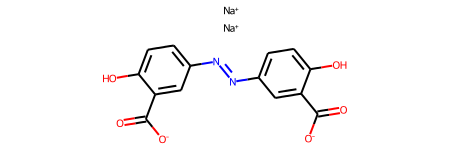

In [3249]:
M10 = mol_list [9]
M10

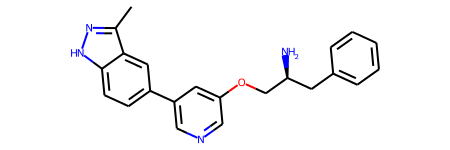

In [3250]:
M11 = mol_list [10]
M11

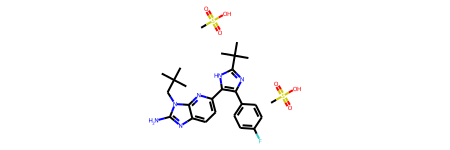

In [3251]:
M12 = mol_list [11]
M12

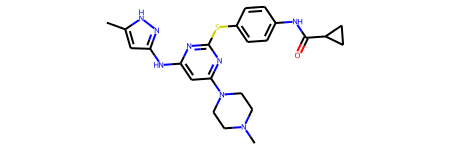

In [3252]:
M13 = mol_list [12]
M13

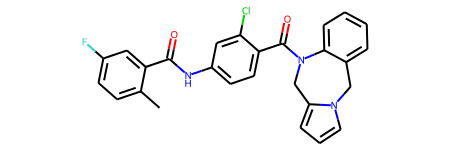

In [3253]:
M14 = mol_list [13]
M14

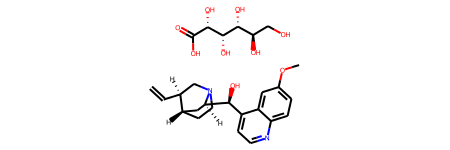

In [3254]:
M15 = mol_list [14]
M15

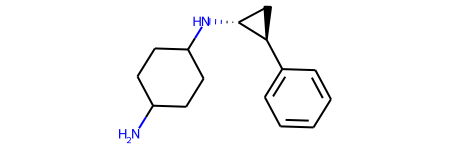

In [3255]:
M16 = mol_list [15]
M16

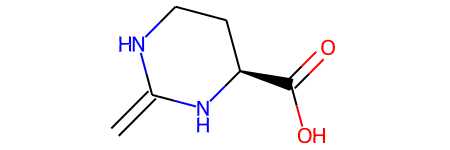

In [3256]:
M17 = mol_list [16]
M17

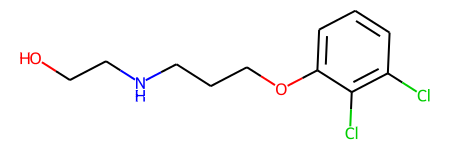

In [3257]:
M18 = mol_list [17]
M18

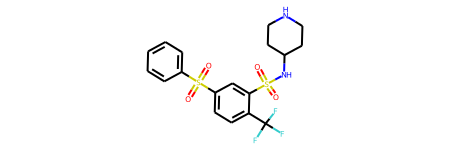

In [3258]:
M19 = mol_list [18]
M19

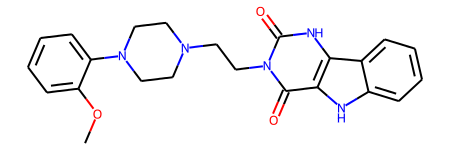

In [3259]:
M20 = mol_list [19]
M20

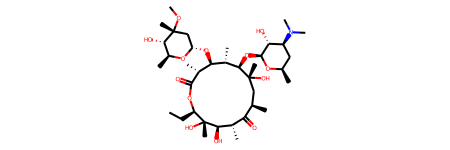

In [3260]:
M21 = mol_list [20]
M21

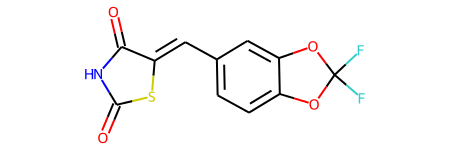

In [3261]:
M22 = mol_list [21]
M22

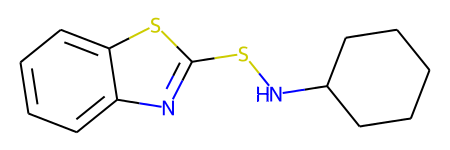

In [3262]:
M23 = mol_list [22]
M23

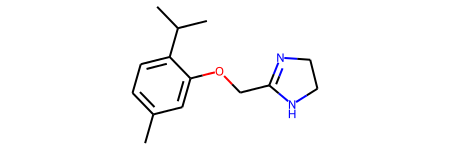

In [3263]:
M24 = mol_list [23]
M24

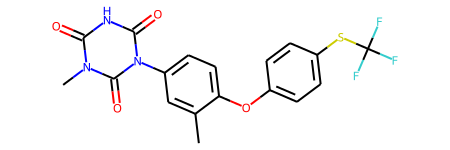

In [3264]:
M25 = mol_list [24]
M25

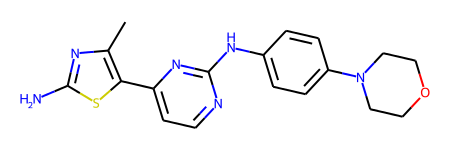

In [3265]:
M26 = mol_list [25]
M26

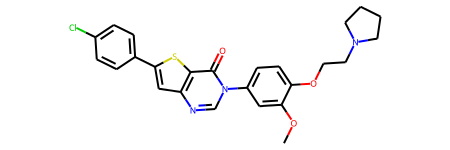

In [3266]:
M27 = mol_list [26]
M27

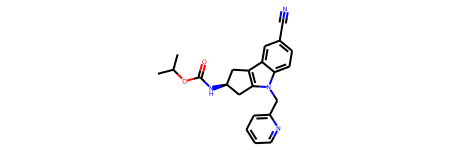

In [3267]:
M28 = mol_list [27]
M28

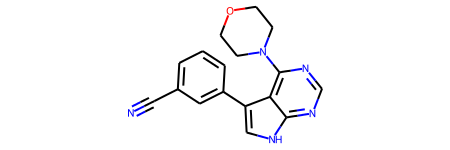

In [3268]:
M29 = mol_list [28]
M29

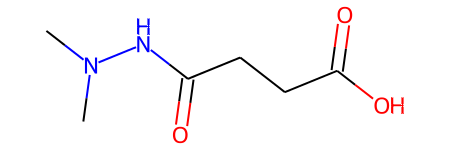

In [3269]:
M30 = mol_list [29]
M30

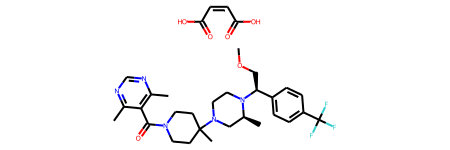

In [3270]:
M31 = mol_list [30]
M31

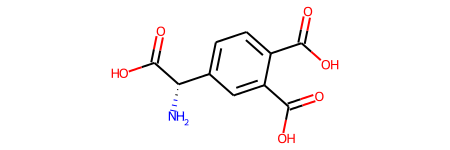

In [3271]:
M32 = mol_list [31]
M32

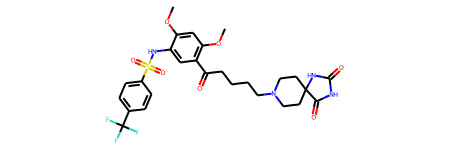

In [3272]:
M33 = mol_list [32]
M33

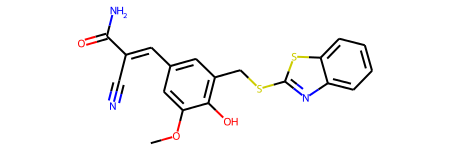

In [3273]:
M34 = mol_list [33]
M34

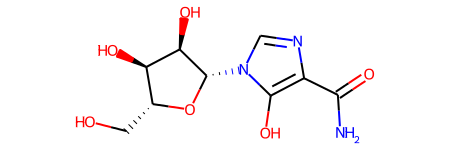

In [3274]:
M35 = mol_list [34]
M35

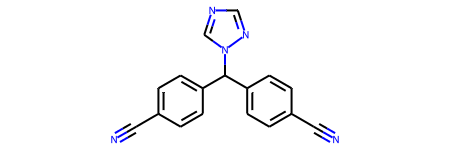

In [3275]:
M36 = mol_list [35]
M36

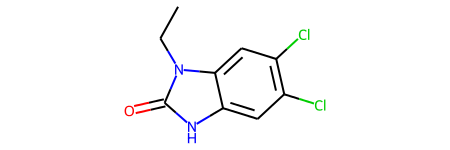

In [3276]:
M37= mol_list [36]
M37

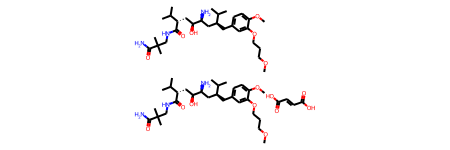

In [3277]:
M38= mol_list [37]
M38

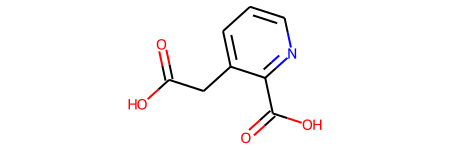

In [3278]:
M39= mol_list [38]
M39

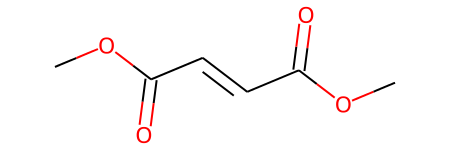

In [3279]:
M40= mol_list [39]
M40

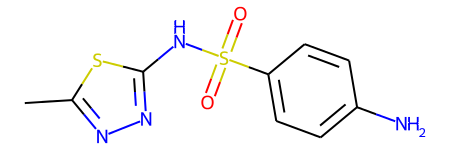

In [3280]:
M41= mol_list [40]
M41

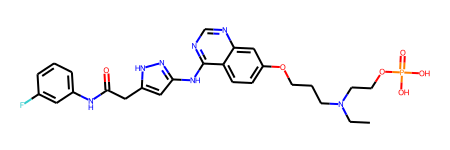

In [3281]:
M42= mol_list [41]
M42

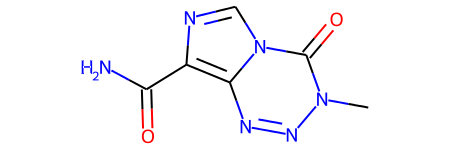

In [3282]:
M43= mol_list [42]
M43

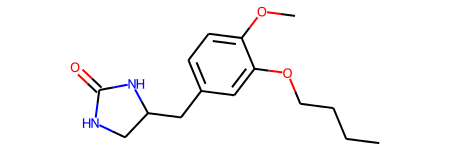

In [3283]:
M44= mol_list [43]
M44

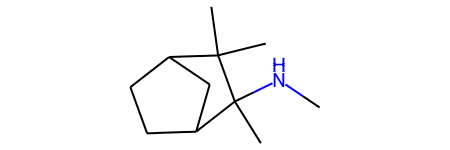

In [3284]:
M45= mol_list [44]
M45

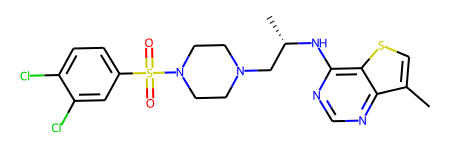

In [3285]:
M46= mol_list [45]
M46

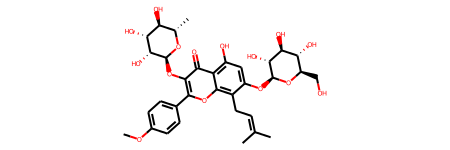

In [3286]:
M47= mol_list [46]
M47

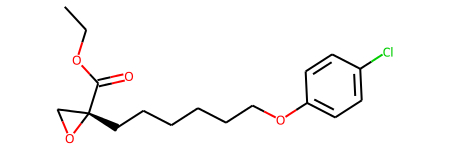

In [3287]:
M48= mol_list [47]
M48

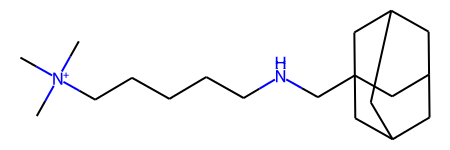

In [3288]:
M49= mol_list [48]
M49

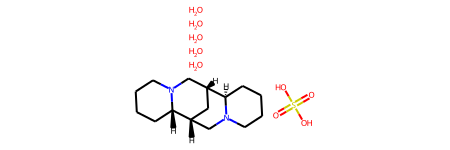

In [3289]:
M50= mol_list [49]
M50

In [3290]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[2,
 33,
 67,
 75,
 80,
 128,
 133,
 136,
 168,
 222,
 278,
 356,
 361,
 378,
 392,
 473,
 493,
 496,
 532,
 572,
 607,
 625,
 666,
 667,
 698,
 707,
 723,
 726,
 728,
 807,
 831,
 849,
 875,
 896,
 909]

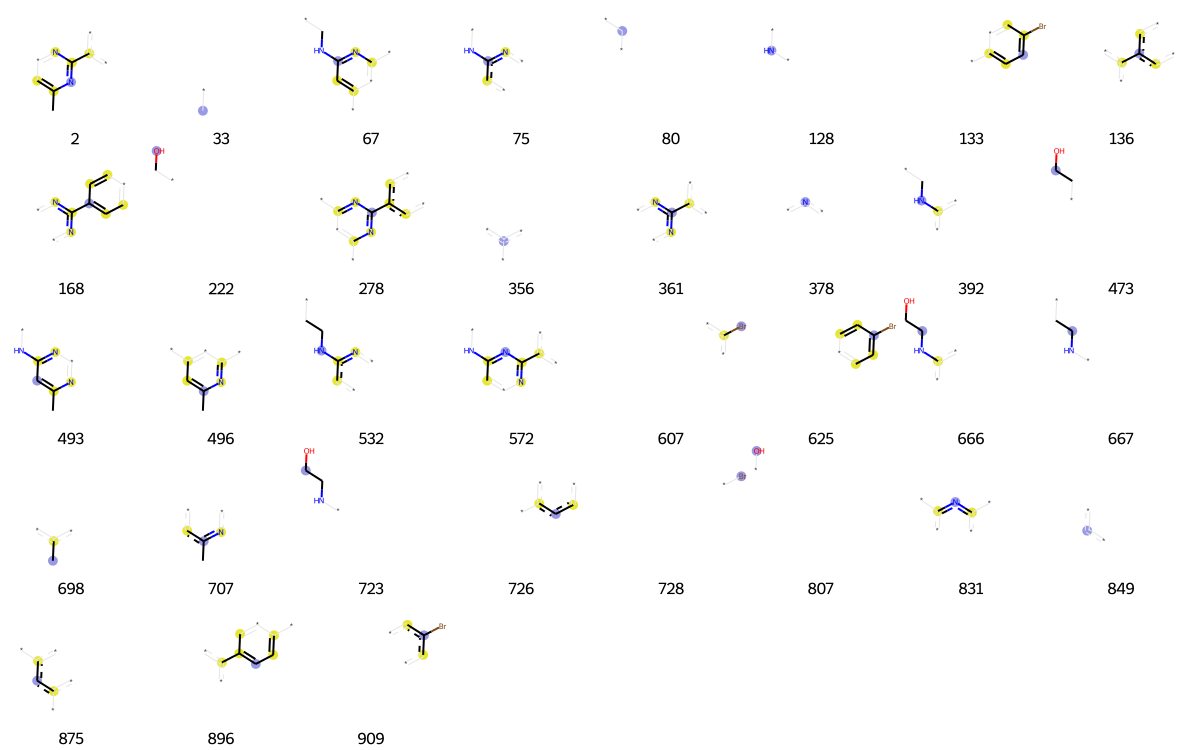

In [3291]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [3292]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[15,
 33,
 53,
 64,
 88,
 104,
 114,
 128,
 157,
 165,
 191,
 208,
 216,
 248,
 301,
 315,
 328,
 338,
 356,
 360,
 378,
 392,
 416,
 470,
 518,
 557,
 561,
 592,
 650,
 656,
 659,
 674,
 687,
 700,
 703,
 725,
 726,
 755,
 790,
 803,
 807,
 849,
 855,
 875,
 893,
 944,
 963]

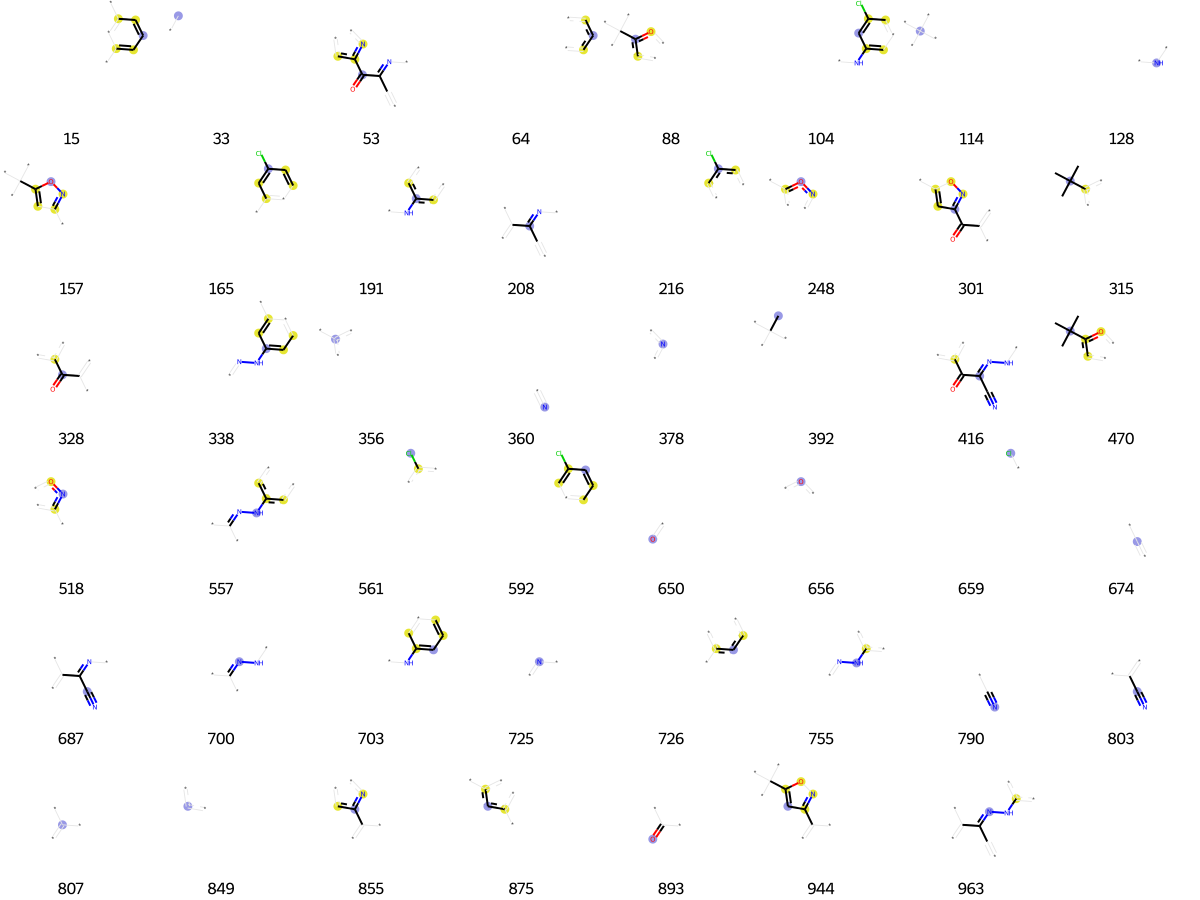

In [3293]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [3294]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 114,
 202,
 208,
 277,
 315,
 322,
 356,
 360,
 391,
 392,
 419,
 431,
 468,
 529,
 563,
 578,
 607,
 674,
 694,
 722,
 728,
 744,
 790,
 803,
 807,
 833,
 849,
 875,
 985,
 1000,
 1009]

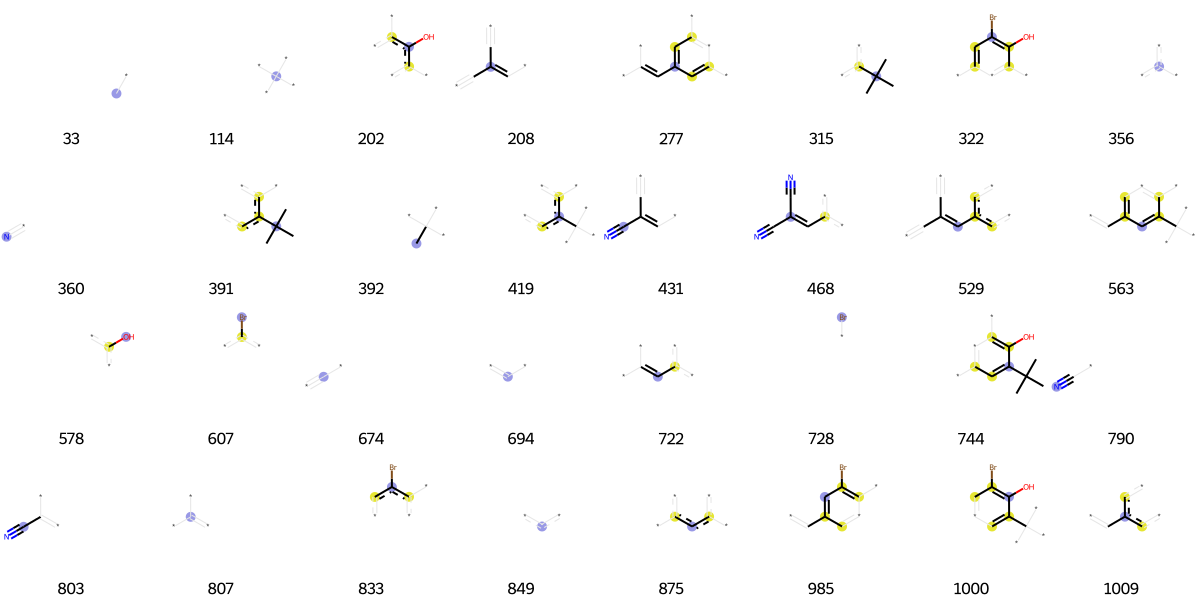

In [3295]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [3296]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 36,
 46,
 64,
 80,
 85,
 136,
 149,
 175,
 199,
 216,
 250,
 318,
 325,
 356,
 389,
 398,
 463,
 472,
 561,
 602,
 624,
 650,
 659,
 713,
 723,
 726,
 735,
 736,
 807,
 816,
 822,
 849,
 862,
 893,
 896,
 914,
 926,
 935,
 939,
 940,
 956,
 981]

In [3297]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[53,
 60,
 73,
 80,
 128,
 133,
 202,
 214,
 215,
 333,
 342,
 343,
 356,
 378,
 392,
 428,
 489,
 607,
 621,
 629,
 694,
 706,
 708,
 726,
 728,
 766,
 786,
 849,
 875,
 909,
 927,
 940,
 961]

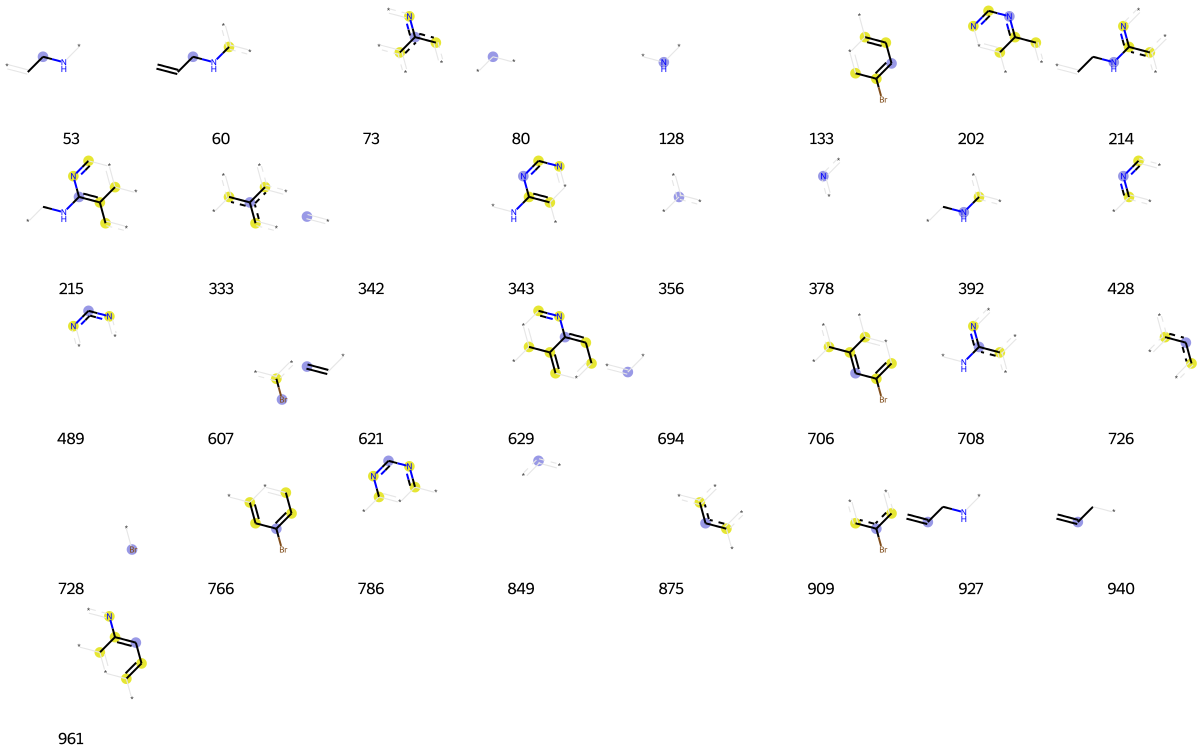

In [3298]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [3299]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[19,
 33,
 40,
 45,
 56,
 64,
 77,
 100,
 121,
 128,
 184,
 191,
 192,
 356,
 378,
 385,
 437,
 459,
 511,
 562,
 579,
 593,
 650,
 703,
 726,
 761,
 792,
 807,
 831,
 842,
 843,
 849,
 860,
 863,
 875,
 893,
 935,
 965,
 966,
 997]

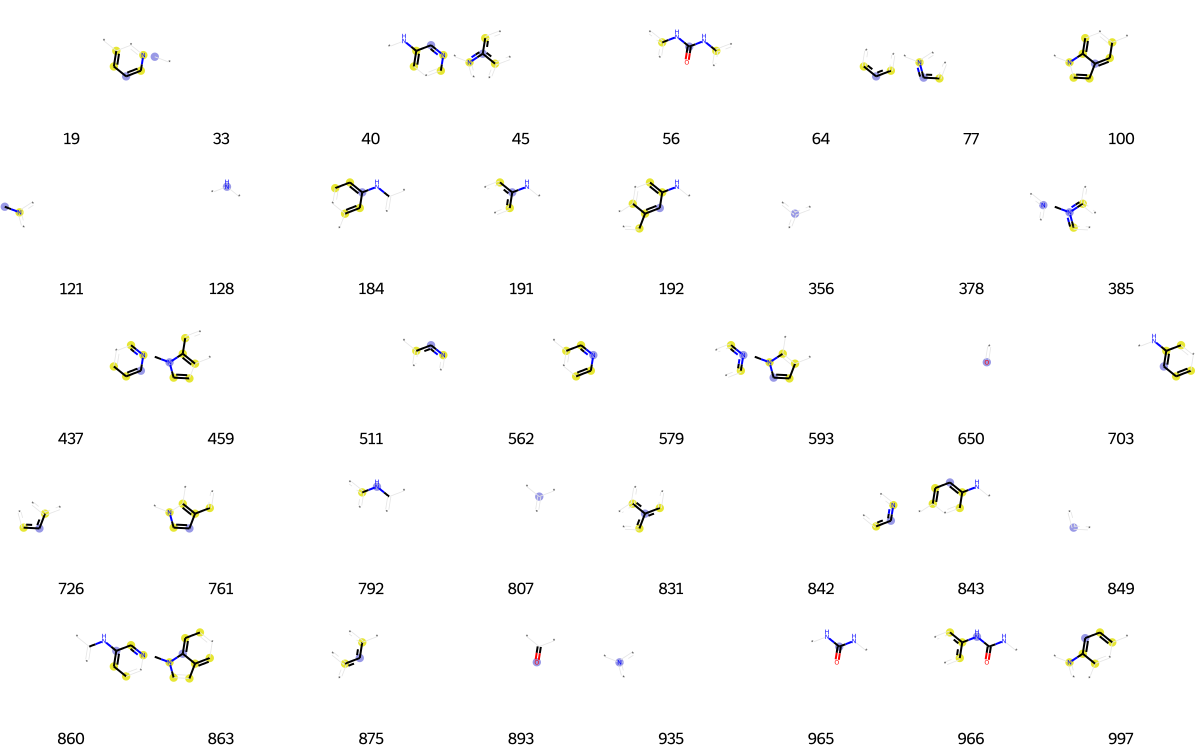

In [3300]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [3301]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[29,
 45,
 64,
 80,
 90,
 121,
 128,
 175,
 215,
 231,
 257,
 261,
 263,
 267,
 282,
 301,
 319,
 333,
 350,
 356,
 361,
 386,
 389,
 398,
 407,
 436,
 452,
 502,
 540,
 544,
 549,
 610,
 646,
 650,
 699,
 713,
 714,
 715,
 719,
 726,
 790,
 802,
 807,
 849,
 883,
 893,
 902,
 904,
 911,
 926,
 935,
 997,
 1002,
 1019]

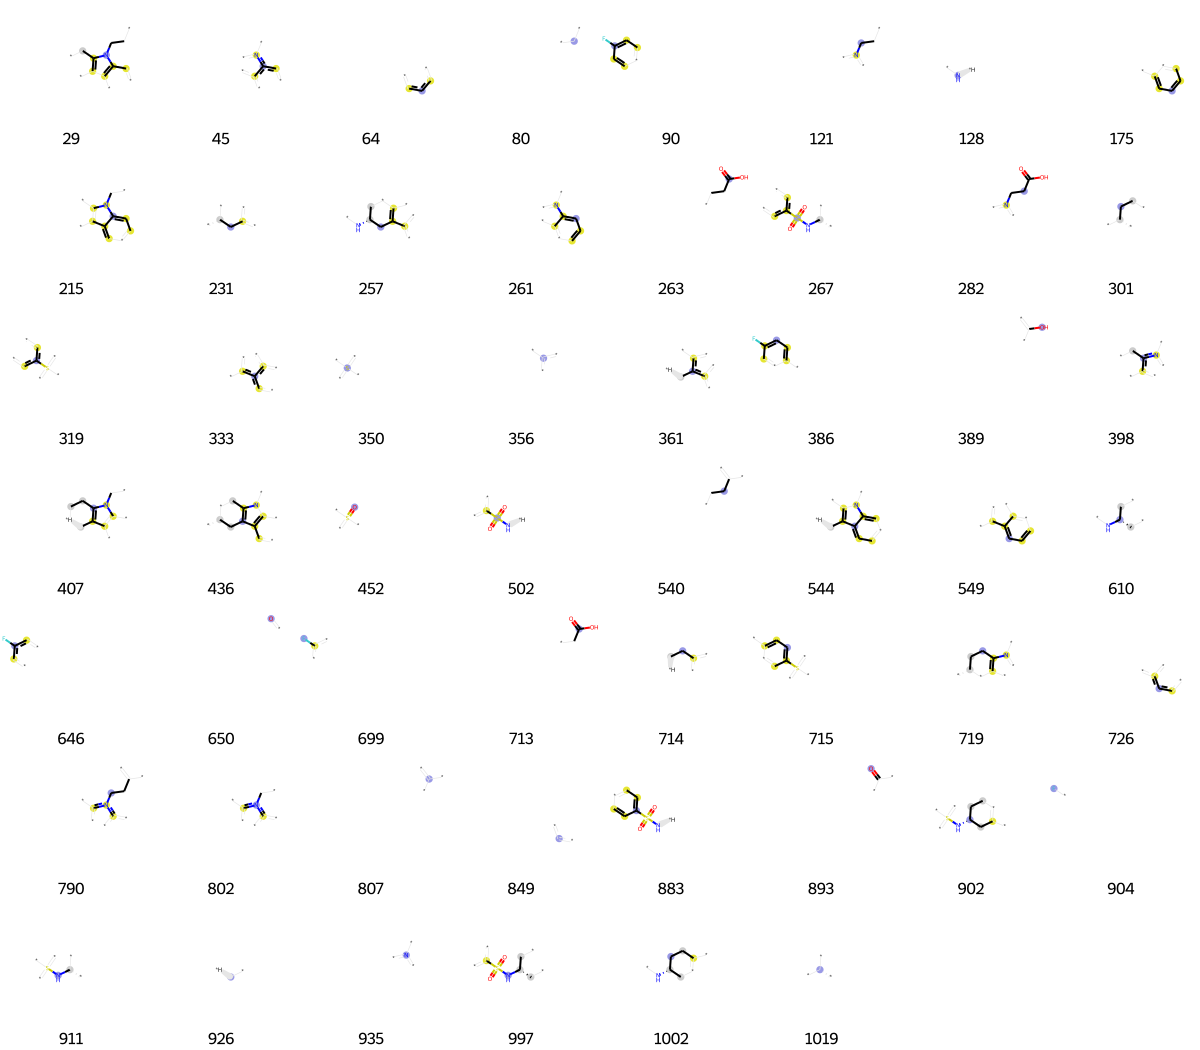

In [3302]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [3303]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[15,
 33,
 58,
 64,
 92,
 128,
 139,
 160,
 217,
 232,
 246,
 248,
 252,
 288,
 333,
 338,
 350,
 356,
 378,
 392,
 414,
 420,
 448,
 452,
 466,
 475,
 483,
 502,
 503,
 518,
 549,
 613,
 650,
 656,
 676,
 698,
 726,
 849,
 881,
 992,
 994]

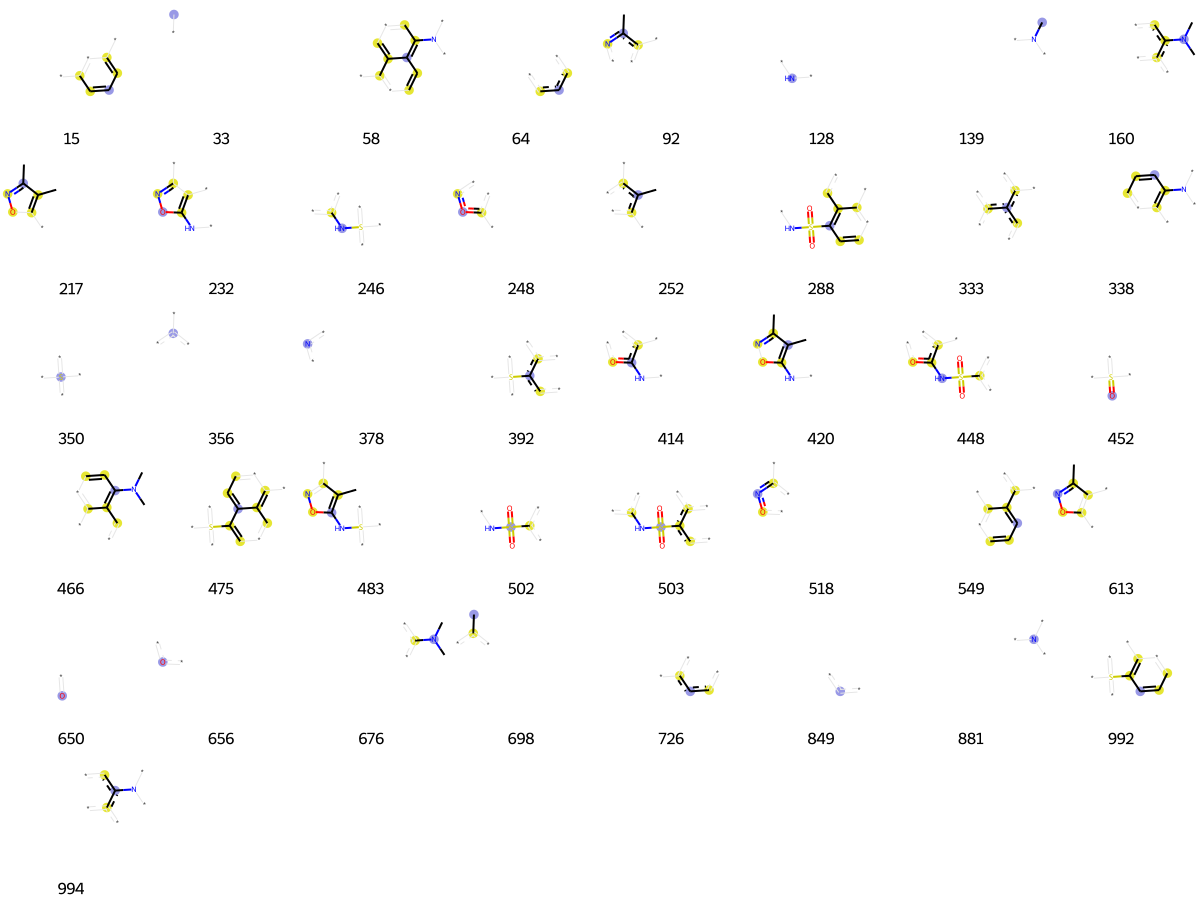

In [3304]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [3305]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[2,
 3,
 4,
 36,
 43,
 64,
 77,
 78,
 83,
 90,
 126,
 135,
 175,
 193,
 212,
 226,
 231,
 244,
 314,
 333,
 352,
 356,
 369,
 378,
 384,
 416,
 428,
 446,
 456,
 464,
 511,
 526,
 546,
 565,
 570,
 600,
 633,
 646,
 650,
 662,
 668,
 699,
 726,
 767,
 807,
 819,
 834,
 835,
 838,
 849,
 875,
 893,
 904,
 916,
 922,
 926,
 935,
 945,
 950,
 955,
 956,
 974,
 985,
 1014,
 1015,
 1023]

In [3306]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[187,
 189,
 202,
 356,
 451,
 544,
 569,
 578,
 583,
 650,
 656,
 674,
 687,
 715,
 725,
 726,
 807,
 830,
 849,
 875,
 893,
 931,
 967]

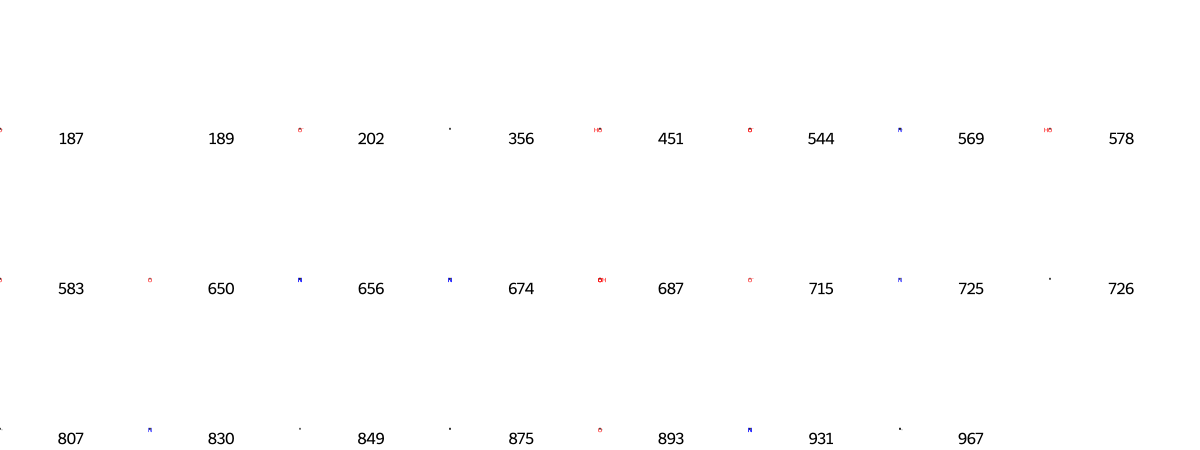

In [3307]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [3308]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 33,
 42,
 64,
 74,
 79,
 80,
 90,
 92,
 118,
 119,
 122,
 136,
 142,
 147,
 173,
 175,
 197,
 208,
 257,
 322,
 333,
 356,
 378,
 389,
 421,
 428,
 449,
 477,
 511,
 552,
 568,
 579,
 594,
 611,
 695,
 698,
 714,
 726,
 730,
 753,
 785,
 786,
 849,
 857,
 875,
 896,
 915,
 980]

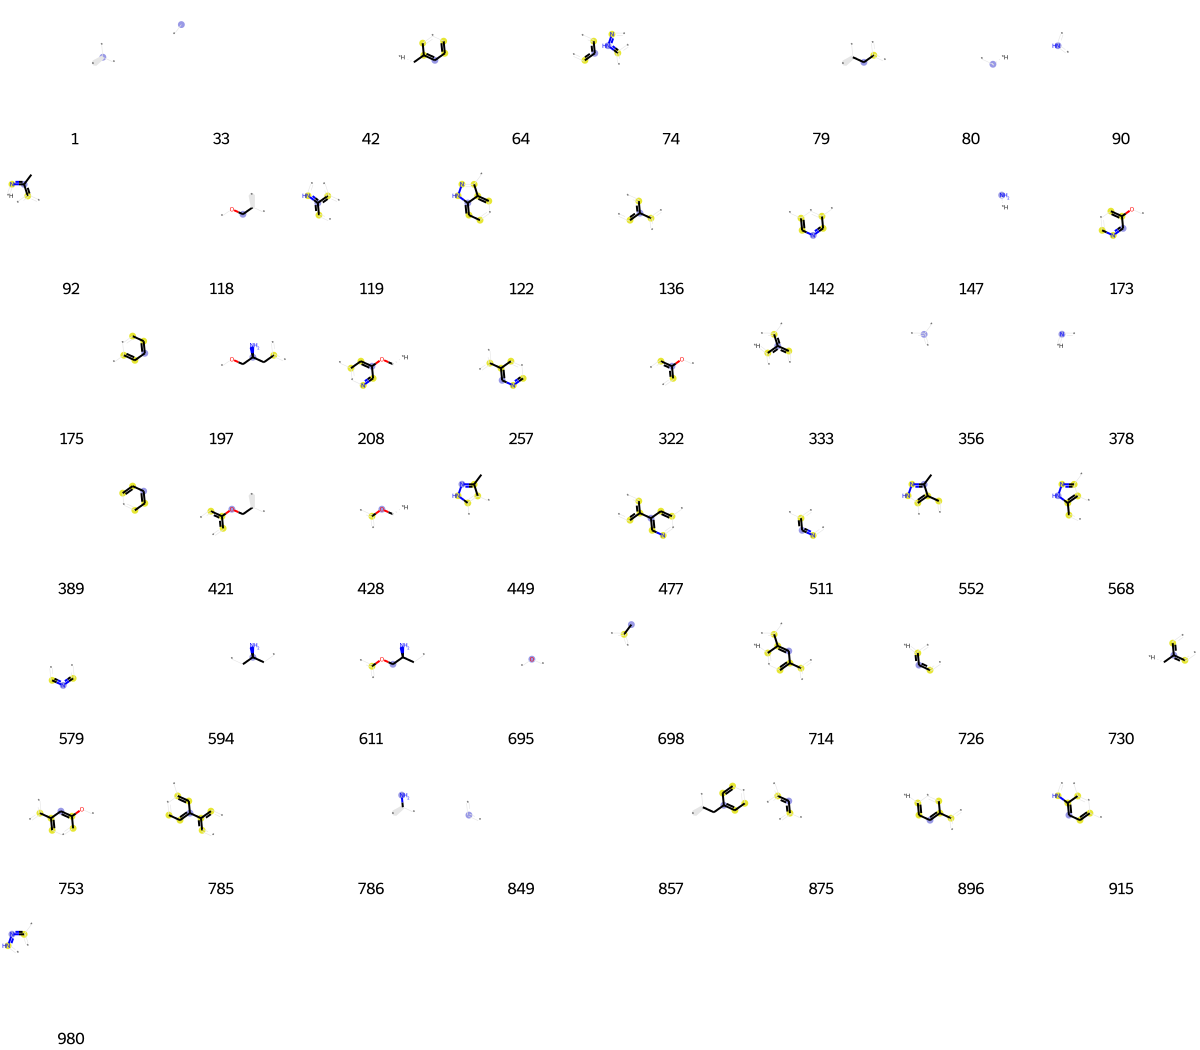

In [3309]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [3310]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 33,
 73,
 80,
 86,
 90,
 114,
 128,
 136,
 147,
 155,
 285,
 286,
 315,
 323,
 340,
 350,
 356,
 378,
 386,
 392,
 433,
 448,
 452,
 471,
 506,
 527,
 592,
 599,
 632,
 646,
 650,
 672,
 692,
 699,
 721,
 726,
 787,
 802,
 807,
 820,
 827,
 831,
 849,
 851,
 896,
 904,
 935,
 953,
 956,
 961,
 964,
 980,
 996,
 997]

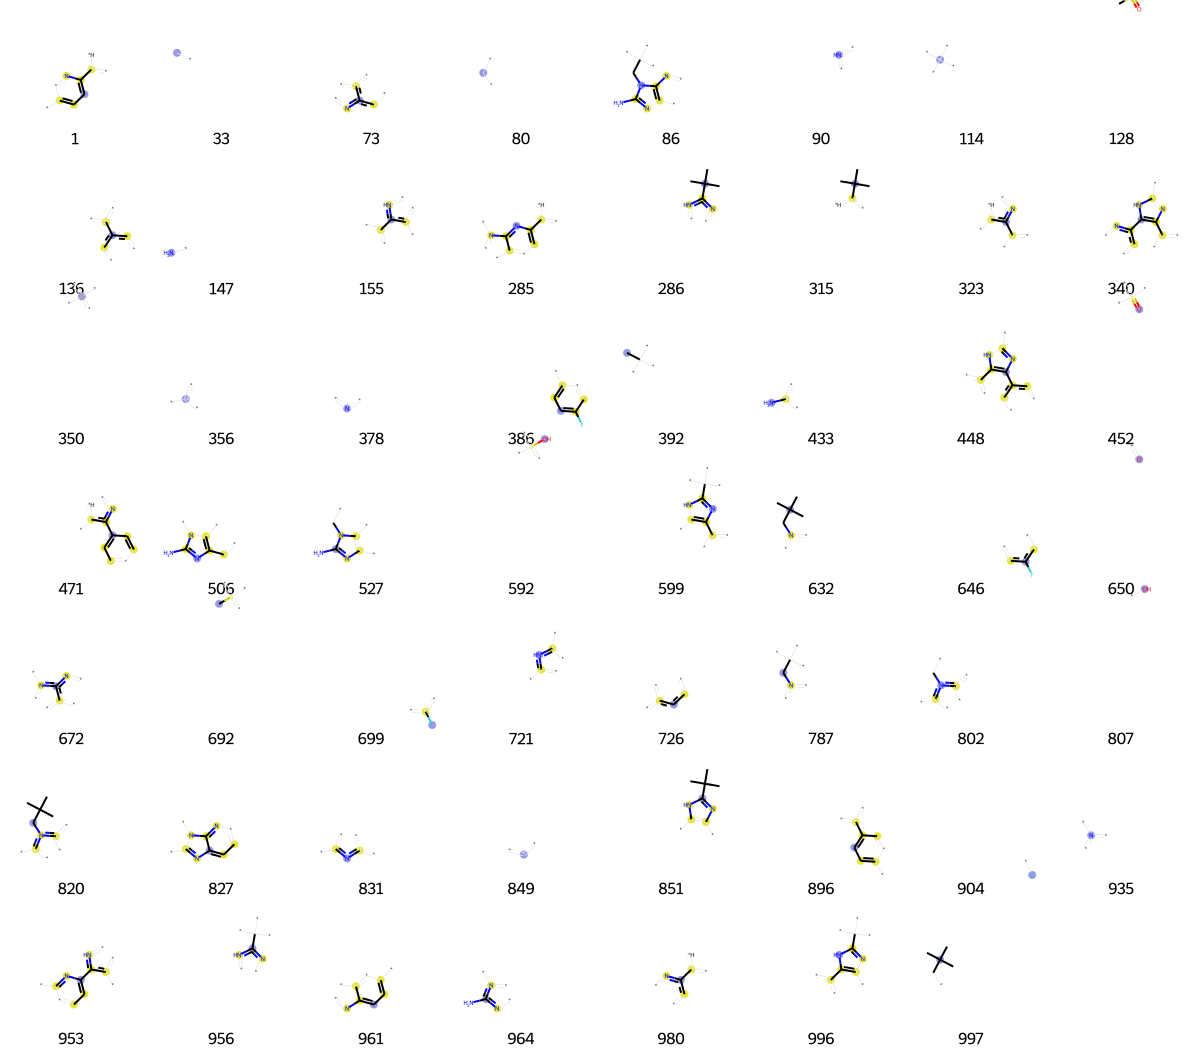

In [3311]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [3312]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[14,
 33,
 53,
 62,
 74,
 75,
 90,
 116,
 121,
 128,
 147,
 151,
 167,
 191,
 207,
 208,
 212,
 231,
 251,
 263,
 268,
 270,
 301,
 315,
 356,
 360,
 378,
 407,
 428,
 456,
 484,
 491,
 527,
 552,
 569,
 603,
 650,
 689,
 692,
 698,
 713,
 726,
 778,
 785,
 792,
 807,
 811,
 831,
 833,
 843,
 849,
 875,
 892,
 893,
 898,
 926,
 935,
 974,
 980,
 1019]

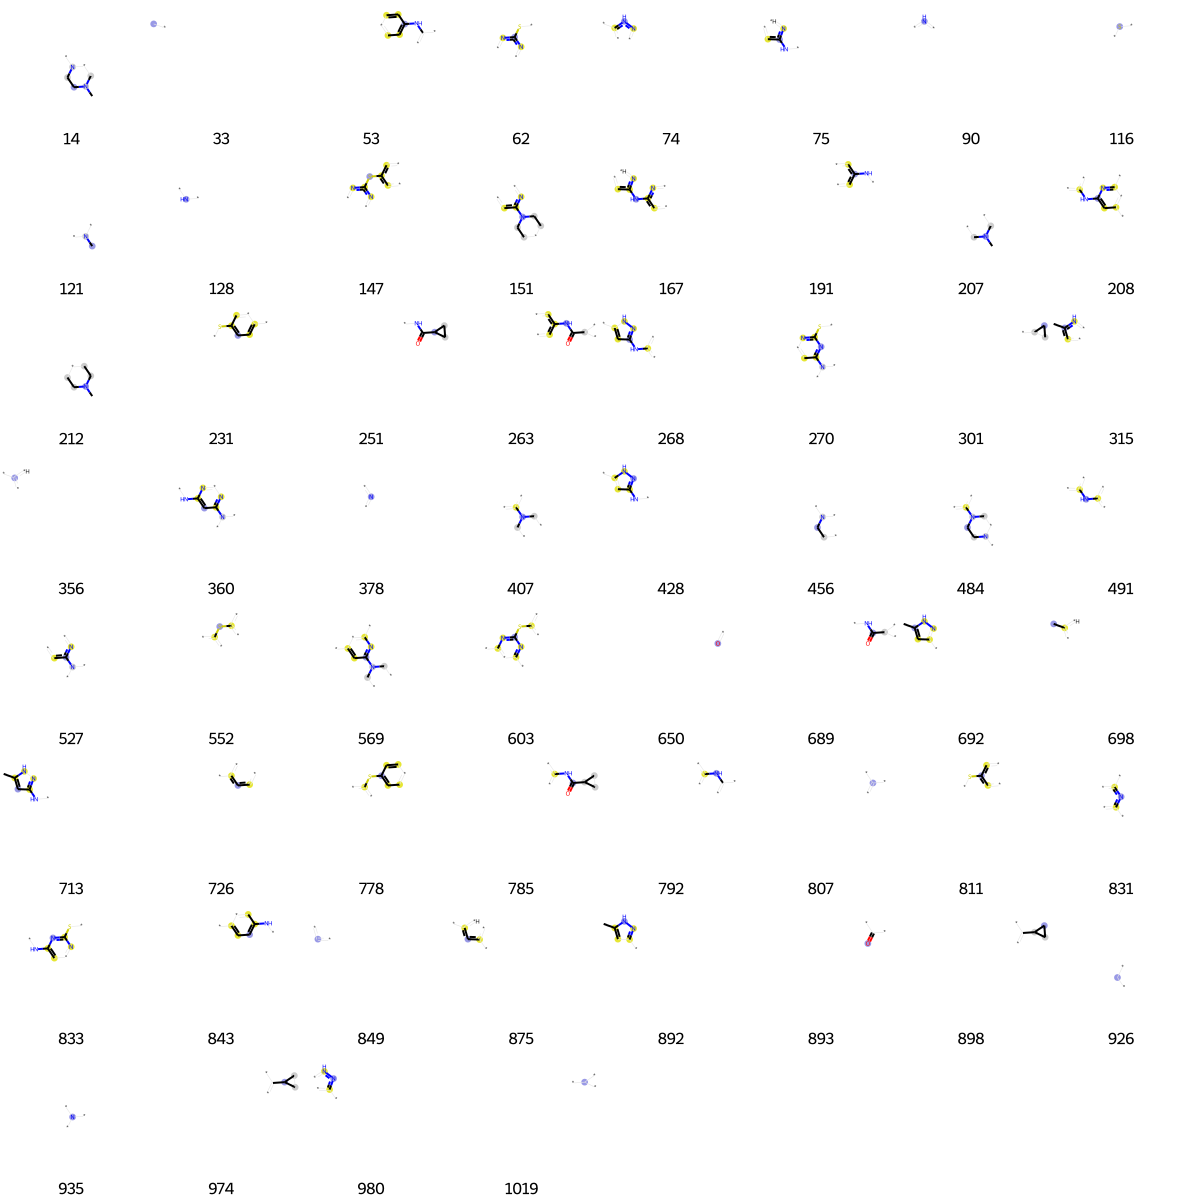

In [3313]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [3314]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[33,
 43,
 64,
 67,
 77,
 95,
 123,
 128,
 165,
 175,
 184,
 191,
 194,
 212,
 250,
 271,
 356,
 363,
 366,
 367,
 386,
 389,
 438,
 463,
 480,
 486,
 520,
 539,
 552,
 557,
 561,
 623,
 626,
 646,
 650,
 659,
 667,
 679,
 684,
 698,
 699,
 726,
 792,
 807,
 839,
 843,
 847,
 849,
 864,
 866,
 875,
 893,
 904,
 922,
 926,
 927,
 935,
 954,
 967,
 998]

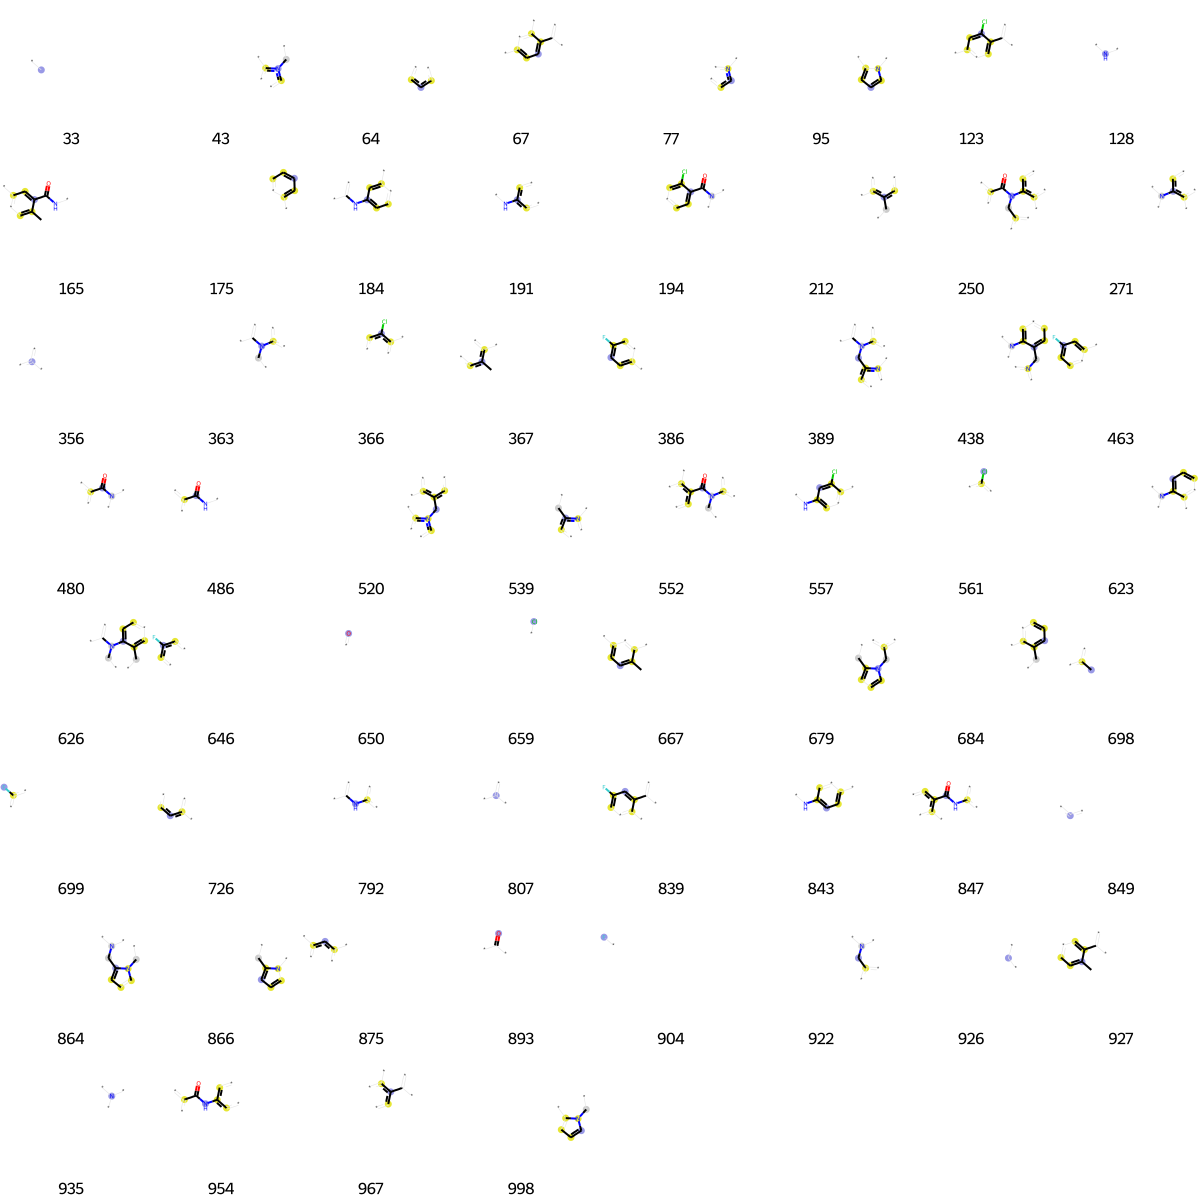

In [3315]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [3316]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 33,
 60,
 73,
 80,
 102,
 115,
 191,
 214,
 216,
 222,
 227,
 231,
 237,
 268,
 301,
 322,
 333,
 342,
 356,
 377,
 378,
 387,
 389,
 390,
 401,
 411,
 428,
 456,
 468,
 482,
 512,
 584,
 585,
 593,
 595,
 613,
 621,
 629,
 638,
 650,
 657,
 694,
 695,
 718,
 726,
 739,
 741,
 781,
 787,
 807,
 820,
 829,
 830,
 831,
 841,
 842,
 849,
 852,
 875,
 876,
 888,
 893,
 926,
 935,
 940,
 948,
 961,
 1019,
 1022]

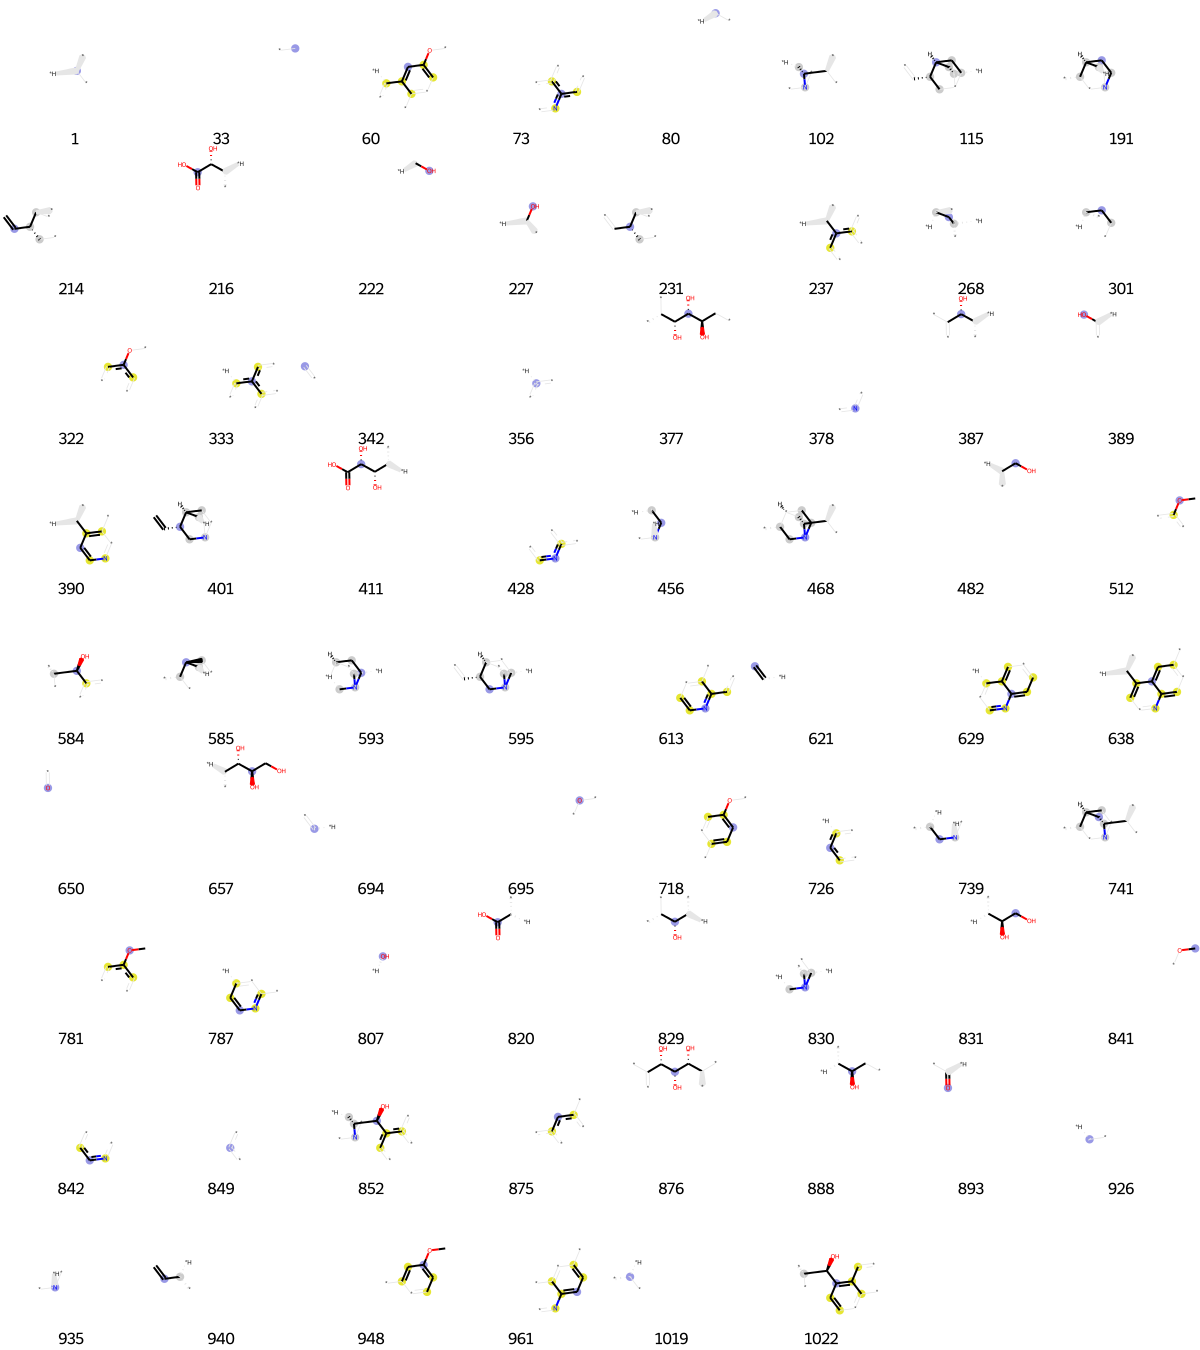

In [3317]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [3318]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[9,
 29,
 64,
 128,
 147,
 175,
 227,
 254,
 255,
 260,
 268,
 272,
 301,
 356,
 379,
 389,
 455,
 476,
 610,
 639,
 712,
 726,
 808,
 849,
 860,
 903,
 926,
 964,
 1019]

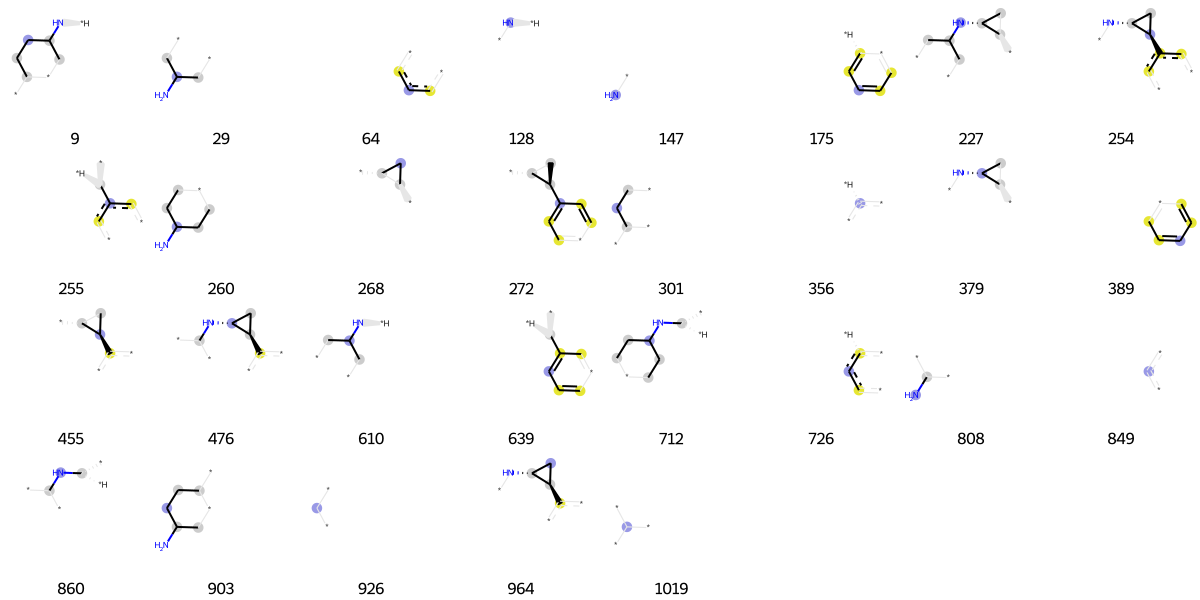

In [3319]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [3320]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[35,
 90,
 120,
 242,
 301,
 305,
 327,
 342,
 356,
 362,
 389,
 407,
 437,
 553,
 596,
 630,
 650,
 807,
 842,
 856,
 893,
 926,
 1019]

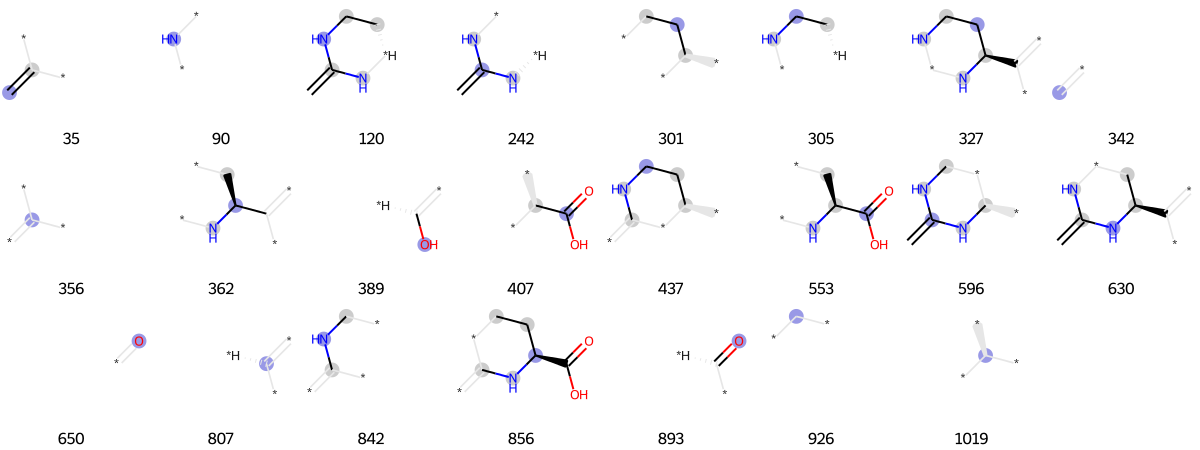

In [3321]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [3322]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[13,
 15,
 64,
 80,
 128,
 222,
 245,
 298,
 311,
 356,
 366,
 386,
 428,
 437,
 473,
 490,
 494,
 561,
 600,
 659,
 667,
 695,
 723,
 726,
 771,
 807,
 849,
 887,
 946,
 974,
 1004,
 1011]

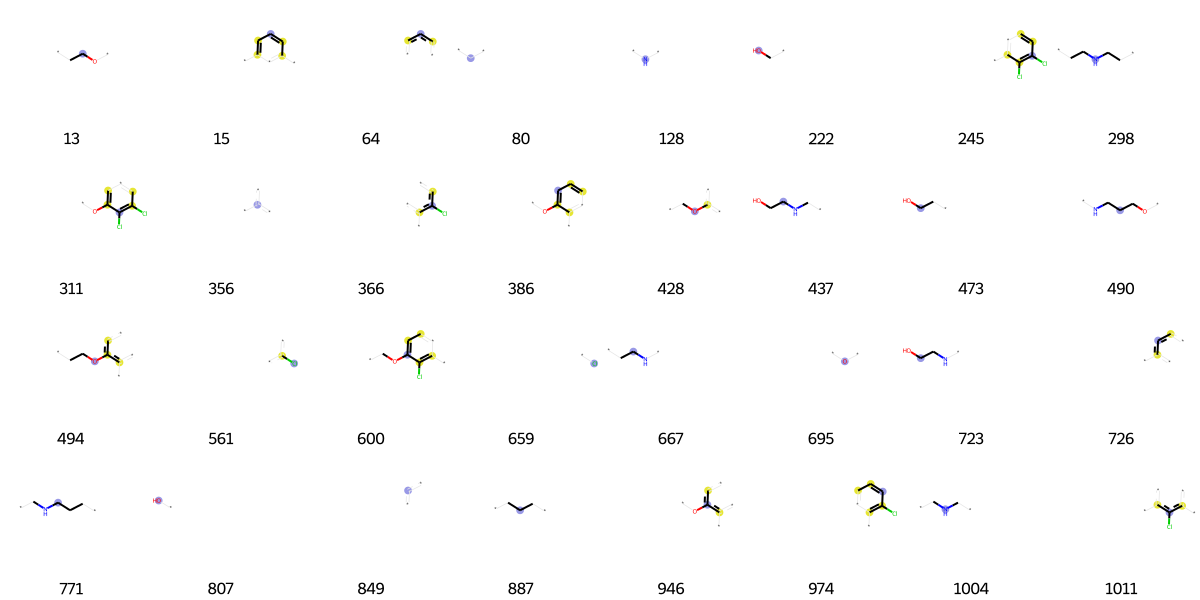

In [3323]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [3324]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[64,
 79,
 90,
 114,
 128,
 155,
 175,
 188,
 262,
 284,
 301,
 305,
 317,
 319,
 350,
 356,
 389,
 392,
 419,
 429,
 446,
 452,
 492,
 502,
 547,
 575,
 606,
 610,
 623,
 650,
 715,
 726,
 809,
 835,
 849,
 875,
 893,
 904,
 908,
 911,
 926,
 974,
 997,
 1019]

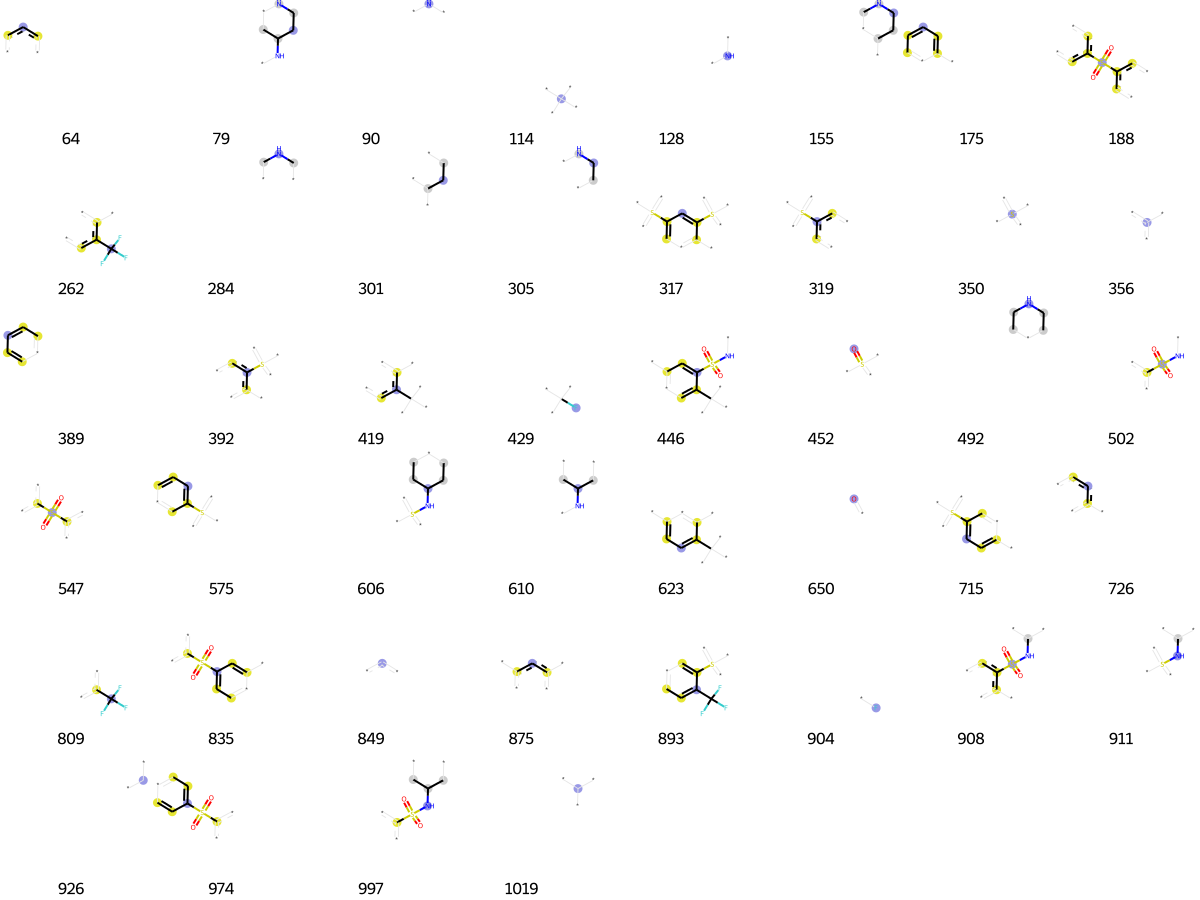

In [3325]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [3326]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 42,
 64,
 74,
 80,
 90,
 119,
 121,
 153,
 175,
 223,
 231,
 249,
 271,
 275,
 314,
 333,
 342,
 356,
 386,
 400,
 407,
 415,
 417,
 456,
 458,
 484,
 504,
 506,
 512,
 549,
 575,
 623,
 650,
 695,
 721,
 726,
 758,
 759,
 767,
 780,
 802,
 841,
 849,
 885,
 915,
 926,
 935,
 946,
 1016]

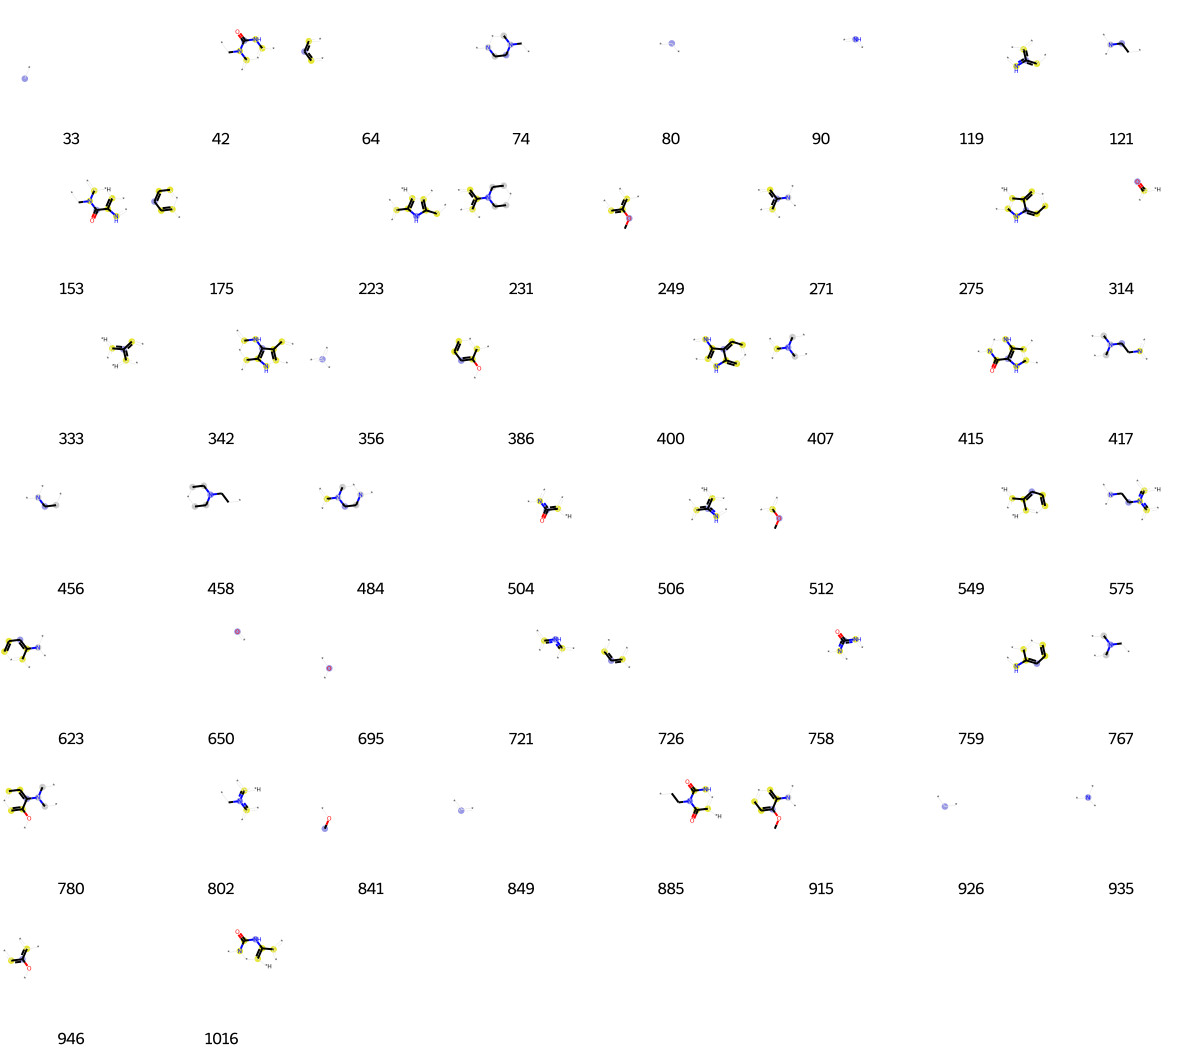

In [3327]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [3328]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[30,
 33,
 36,
 42,
 80,
 129,
 130,
 138,
 139,
 140,
 149,
 152,
 193,
 206,
 231,
 233,
 242,
 248,
 250,
 251,
 268,
 269,
 278,
 279,
 285,
 289,
 294,
 299,
 314,
 317,
 342,
 349,
 356,
 357,
 371,
 403,
 426,
 430,
 438,
 463,
 467,
 485,
 522,
 560,
 605,
 611,
 612,
 644,
 649,
 650,
 655,
 656,
 679,
 687,
 695,
 722,
 739,
 750,
 755,
 759,
 764,
 807,
 841,
 861,
 869,
 881,
 886,
 897,
 926,
 941,
 960,
 967,
 1019]

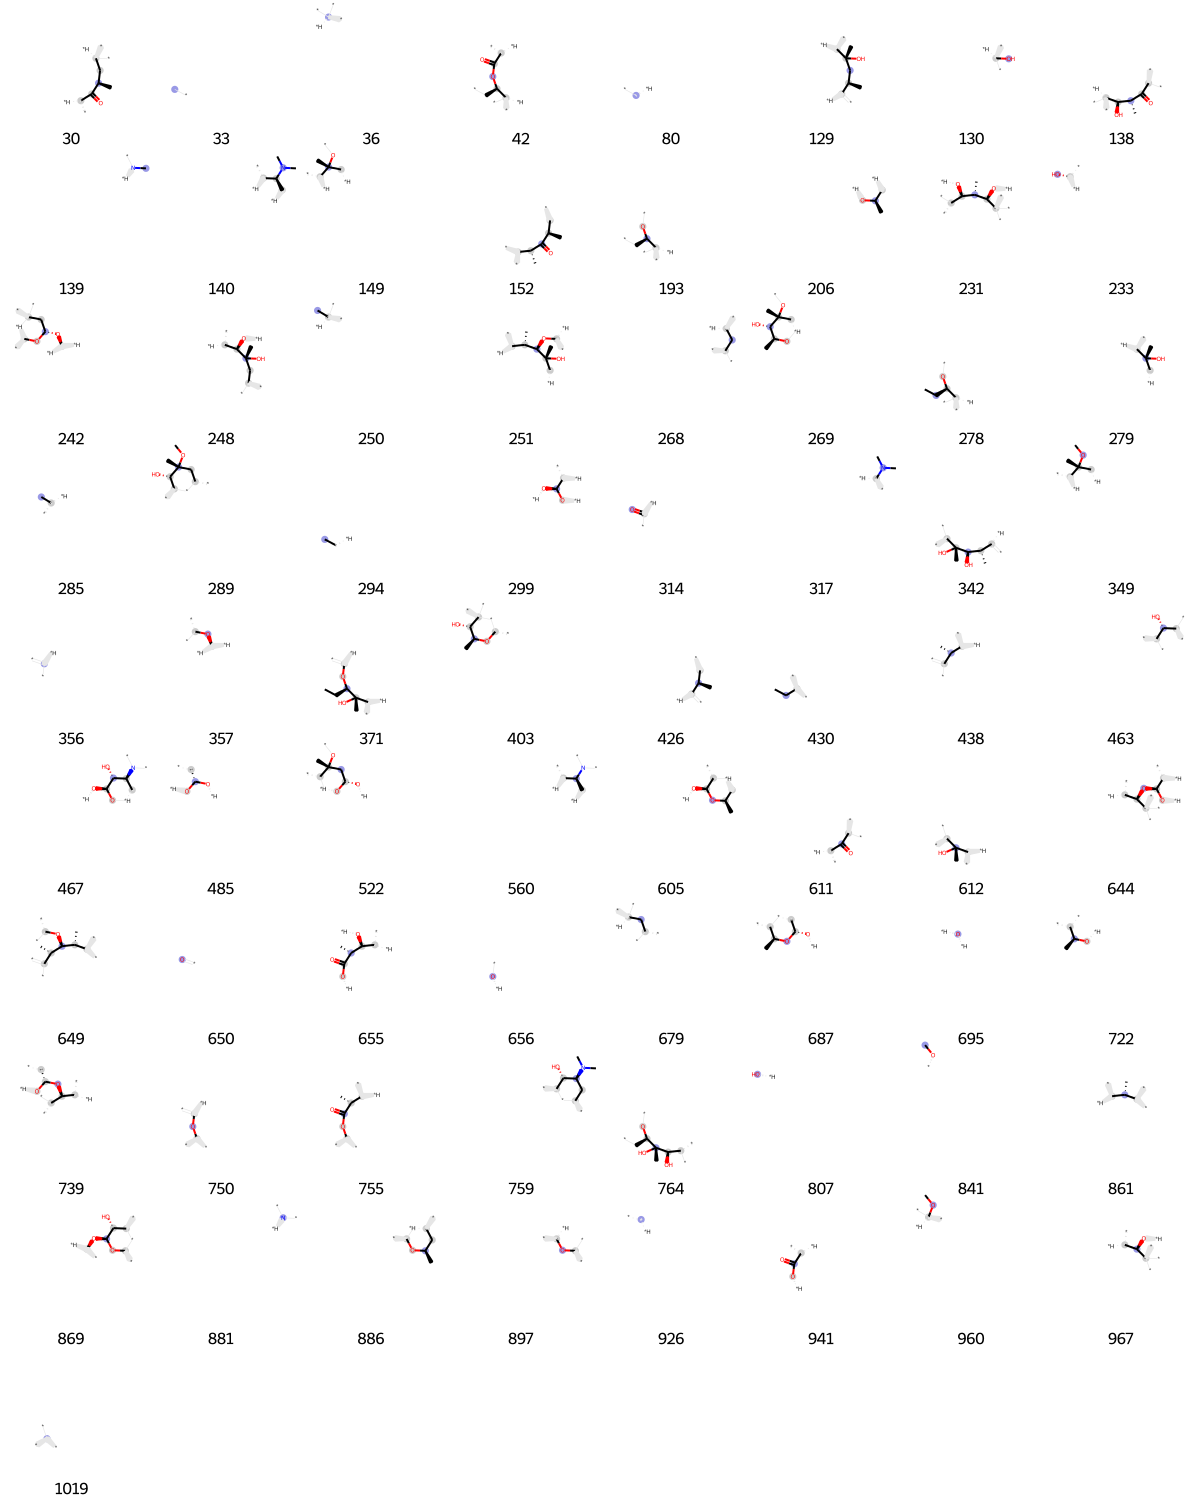

In [3329]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [3330]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[3,
 11,
 25,
 36,
 90,
 166,
 215,
 251,
 258,
 265,
 273,
 281,
 300,
 314,
 356,
 358,
 424,
 531,
 546,
 633,
 650,
 656,
 657,
 675,
 694,
 726,
 749,
 849,
 875,
 881,
 904,
 926,
 1009,
 1020]

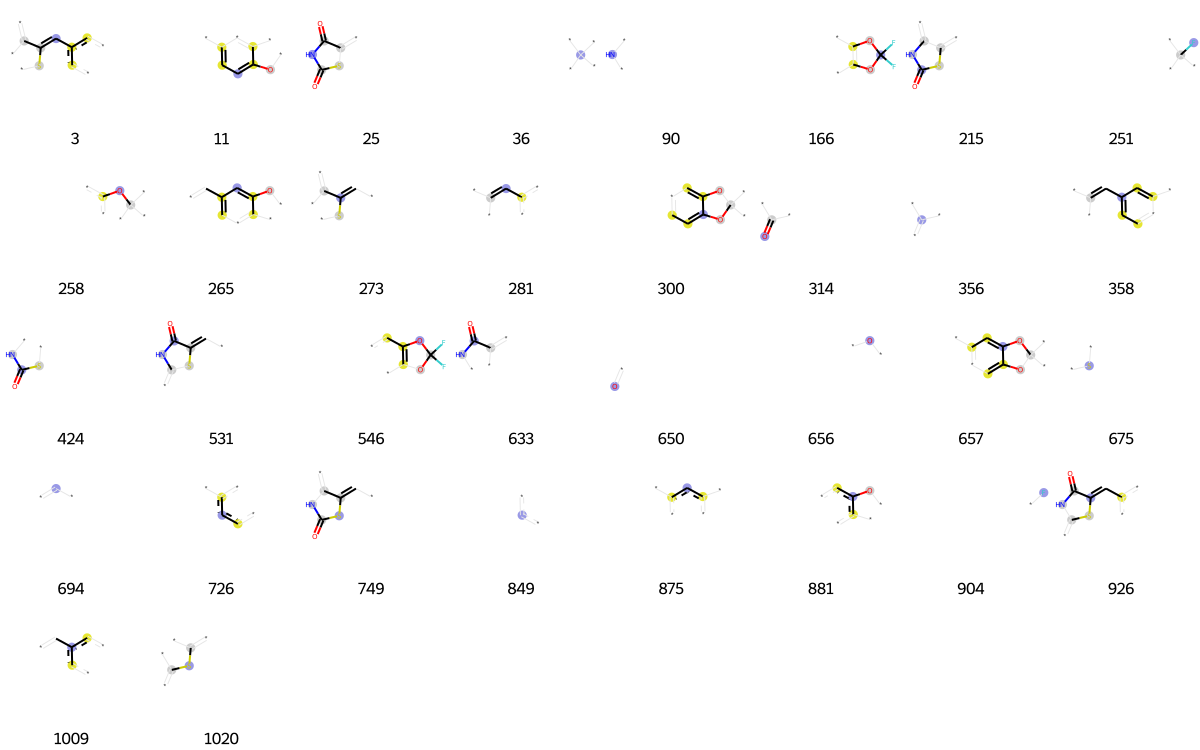

In [3331]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [3332]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[2,
 4,
 64,
 73,
 116,
 128,
 162,
 175,
 289,
 298,
 301,
 317,
 356,
 378,
 388,
 428,
 448,
 461,
 518,
 557,
 609,
 610,
 675,
 726,
 783,
 831,
 849,
 880,
 885,
 890,
 926,
 980,
 999,
 1019]

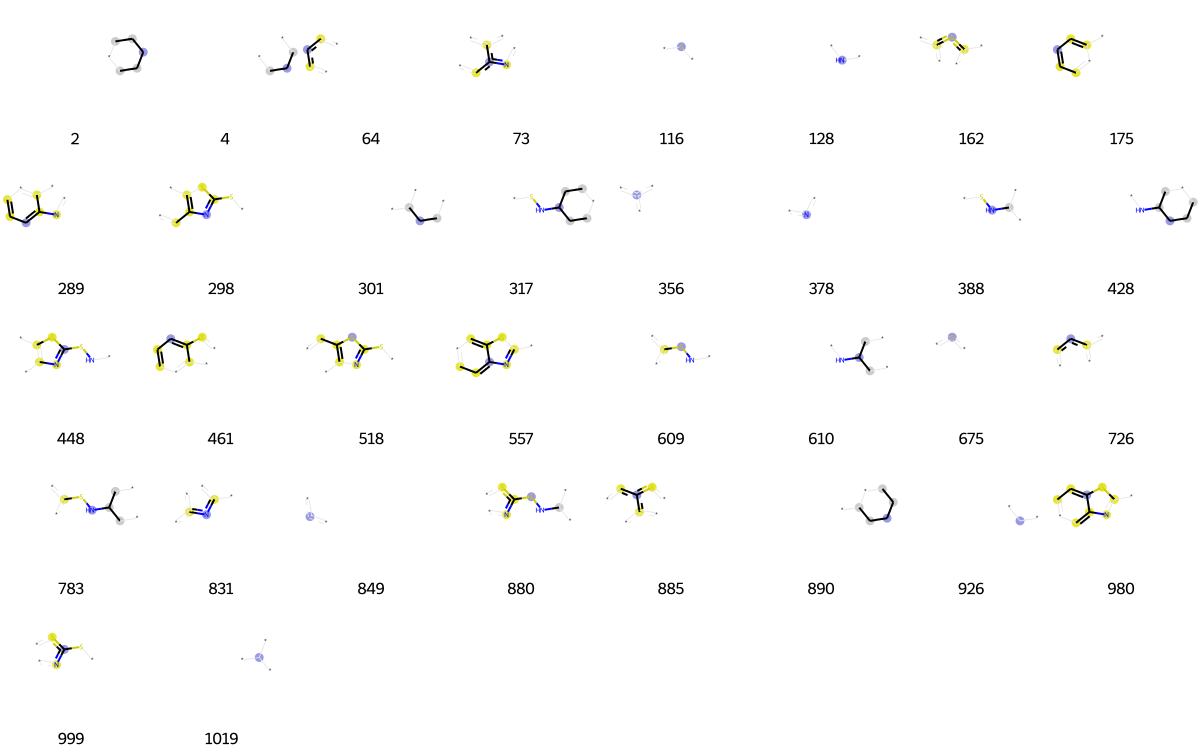

In [3333]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [3334]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 33,
 49,
 80,
 86,
 89,
 90,
 91,
 121,
 202,
 235,
 237,
 283,
 305,
 313,
 356,
 378,
 428,
 501,
 598,
 695,
 696,
 698,
 726,
 745,
 785,
 799,
 805,
 836,
 842,
 849,
 872,
 875,
 881,
 926,
 940,
 946,
 1013]

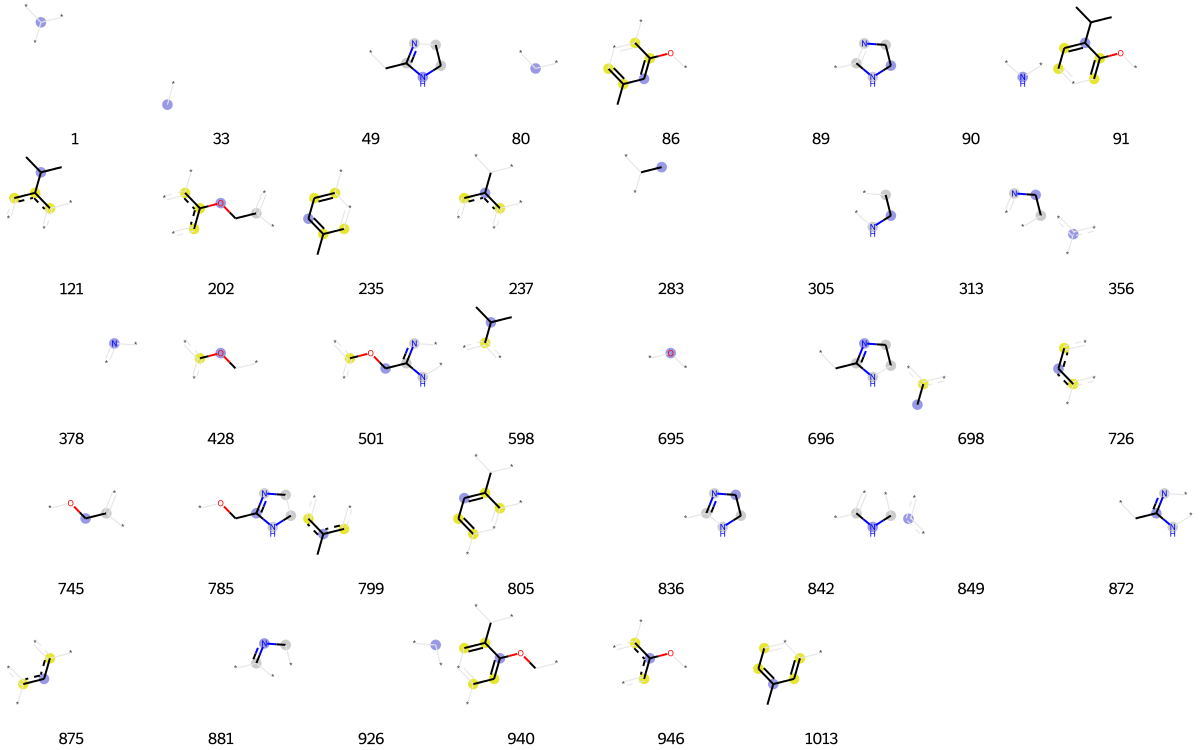

In [3335]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [3336]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[11,
 33,
 37,
 57,
 90,
 94,
 114,
 116,
 121,
 193,
 221,
 230,
 231,
 233,
 240,
 259,
 306,
 314,
 322,
 356,
 367,
 421,
 429,
 479,
 555,
 564,
 593,
 650,
 695,
 698,
 700,
 718,
 721,
 726,
 758,
 771,
 801,
 811,
 824,
 849,
 875,
 882,
 904,
 935,
 946,
 969,
 1017]

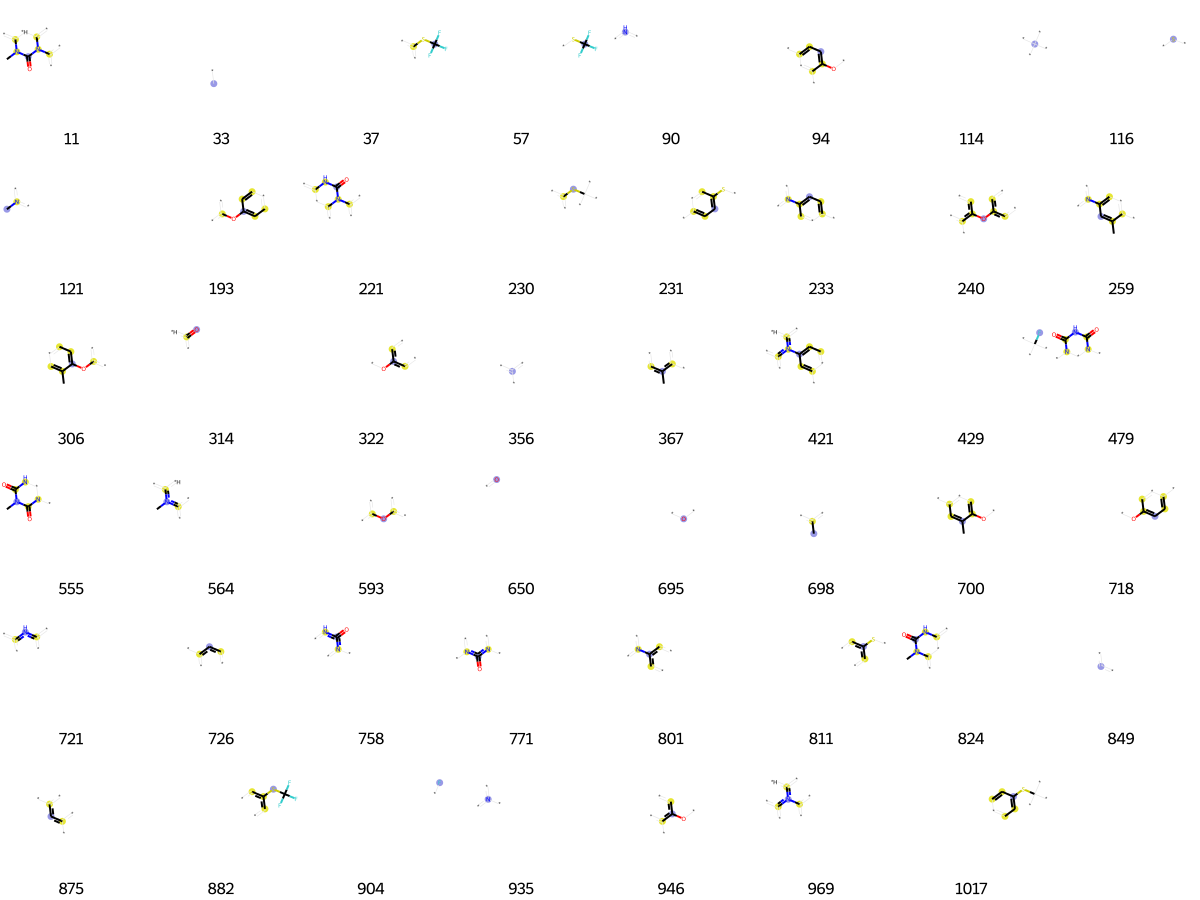

In [3337]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [3338]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 61,
 92,
 128,
 147,
 162,
 191,
 233,
 240,
 277,
 302,
 356,
 378,
 381,
 399,
 407,
 417,
 428,
 433,
 456,
 458,
 491,
 500,
 523,
 558,
 562,
 656,
 675,
 687,
 698,
 726,
 787,
 795,
 801,
 813,
 831,
 842,
 843,
 849,
 926,
 935,
 939,
 950,
 962,
 980,
 1004,
 1005,
 1014]

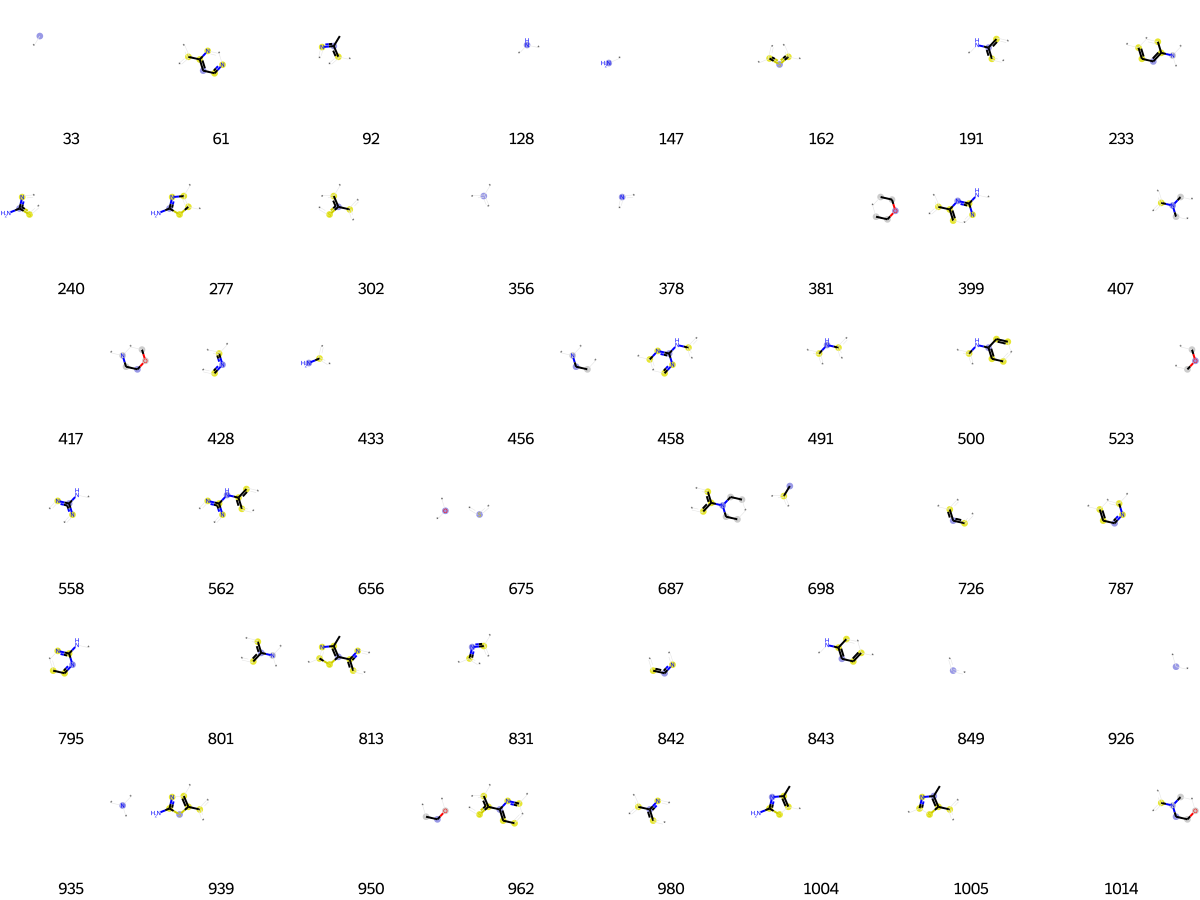

In [3339]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [3340]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[4,
 13,
 15,
 33,
 46,
 62,
 73,
 80,
 81,
 84,
 94,
 121,
 131,
 136,
 162,
 188,
 216,
 221,
 233,
 249,
 314,
 356,
 378,
 383,
 398,
 411,
 422,
 428,
 456,
 458,
 494,
 504,
 512,
 533,
 561,
 564,
 631,
 637,
 650,
 659,
 675,
 695,
 704,
 726,
 767,
 768,
 801,
 808,
 816,
 841,
 849,
 875,
 884,
 896,
 926,
 932,
 935,
 946,
 974,
 1000]

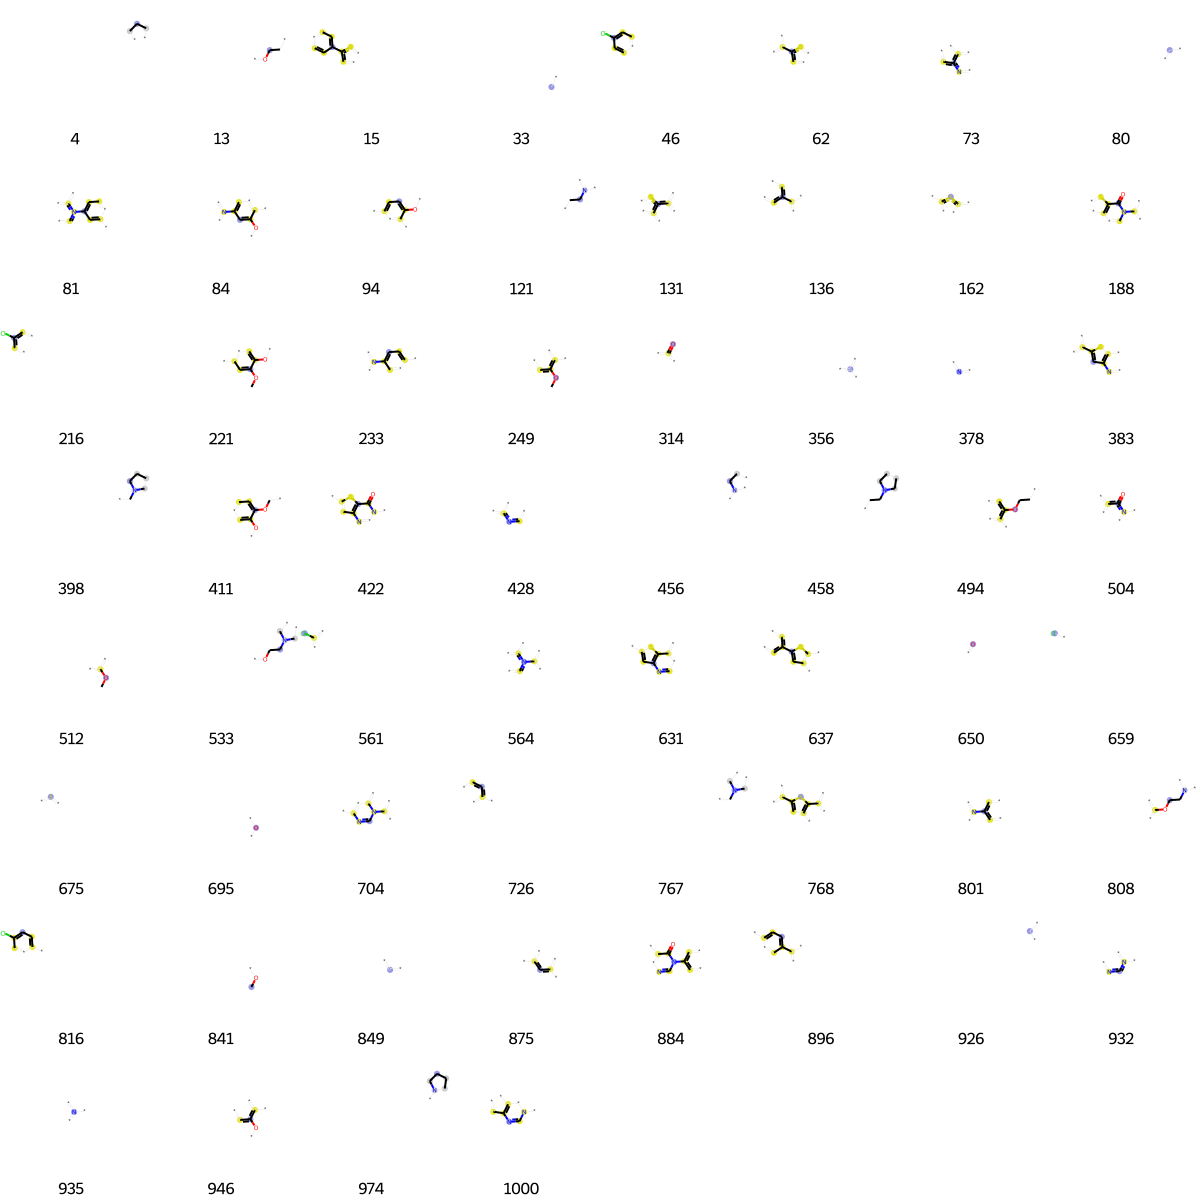

In [3341]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [3342]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 33,
 45,
 64,
 69,
 80,
 102,
 105,
 112,
 128,
 129,
 131,
 172,
 175,
 215,
 231,
 257,
 262,
 283,
 305,
 309,
 330,
 333,
 356,
 360,
 361,
 373,
 374,
 378,
 387,
 398,
 428,
 436,
 448,
 585,
 610,
 612,
 650,
 674,
 695,
 724,
 726,
 734,
 741,
 761,
 790,
 802,
 807,
 829,
 842,
 849,
 875,
 880,
 893,
 899,
 926,
 930,
 935,
 951,
 954,
 997,
 1019]

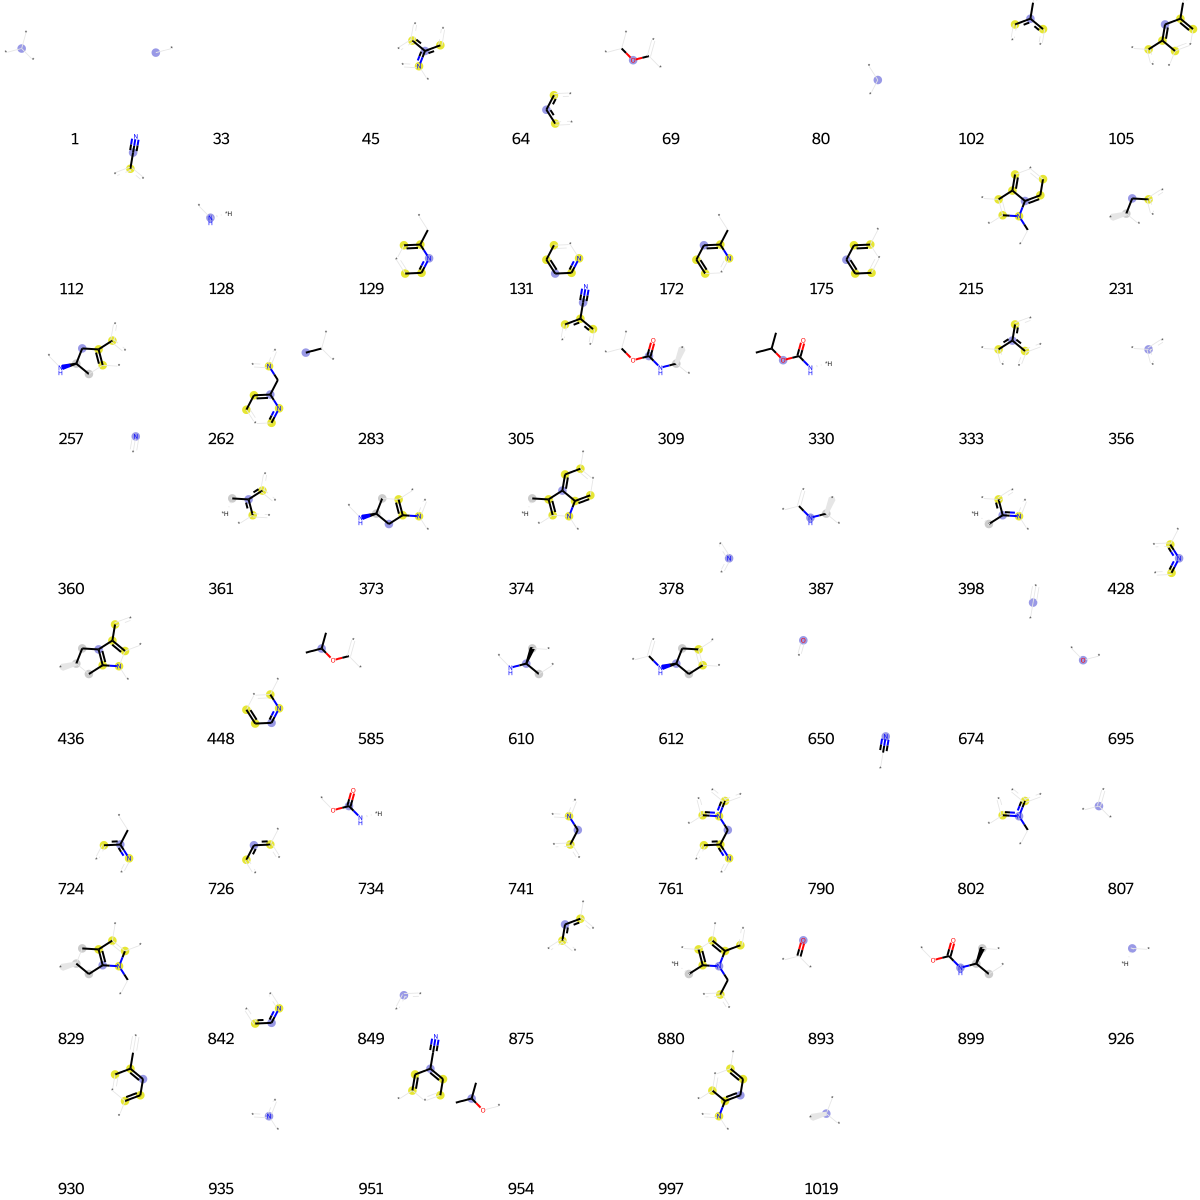

In [3343]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [3344]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[15,
 64,
 90,
 102,
 112,
 128,
 130,
 136,
 147,
 149,
 305,
 323,
 352,
 356,
 360,
 378,
 381,
 407,
 417,
 428,
 439,
 448,
 456,
 489,
 523,
 560,
 656,
 674,
 710,
 724,
 726,
 736,
 786,
 790,
 806,
 818,
 849,
 855,
 856,
 875,
 926,
 935,
 950,
 951,
 960,
 1014]

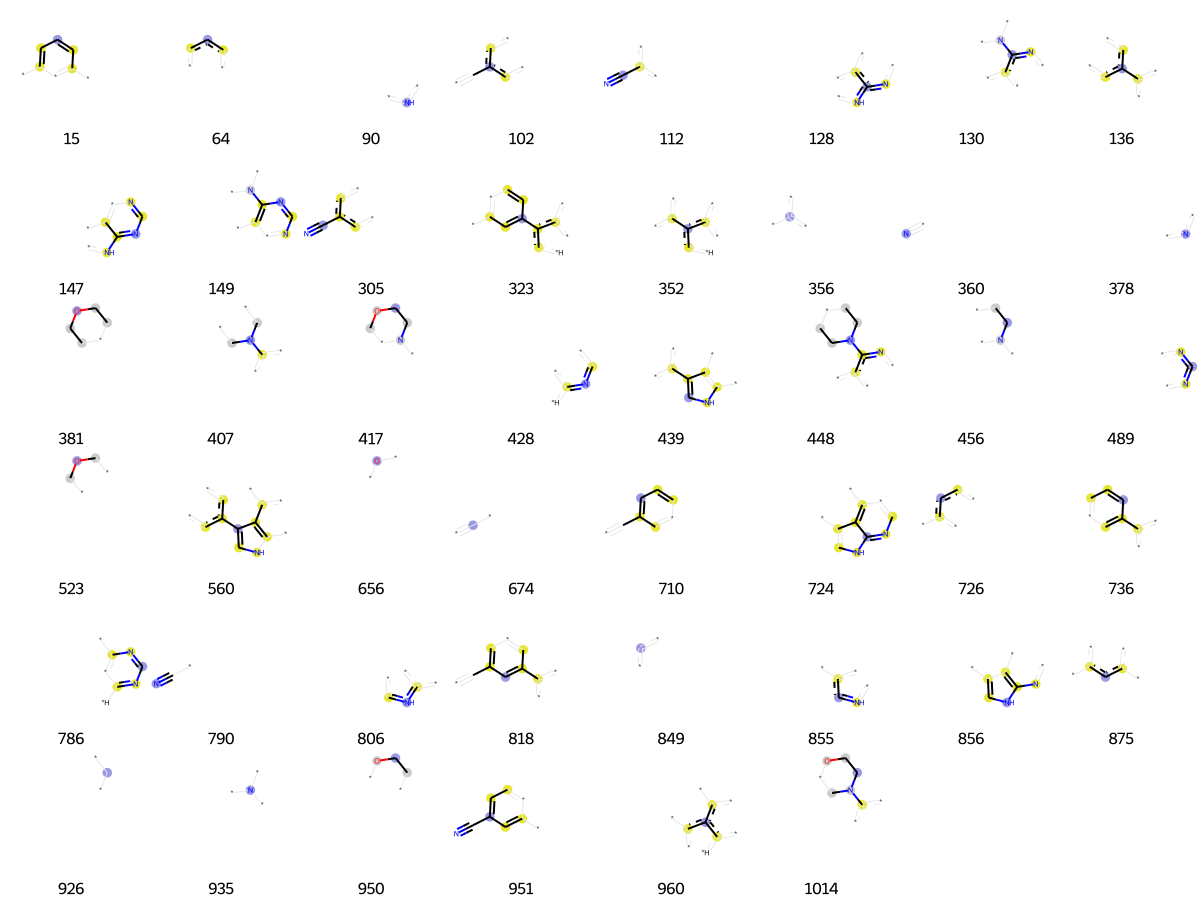

In [3345]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [3346]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 41,
 80,
 128,
 139,
 232,
 263,
 379,
 389,
 472,
 515,
 540,
 650,
 710,
 713,
 737,
 807,
 840,
 881,
 893]

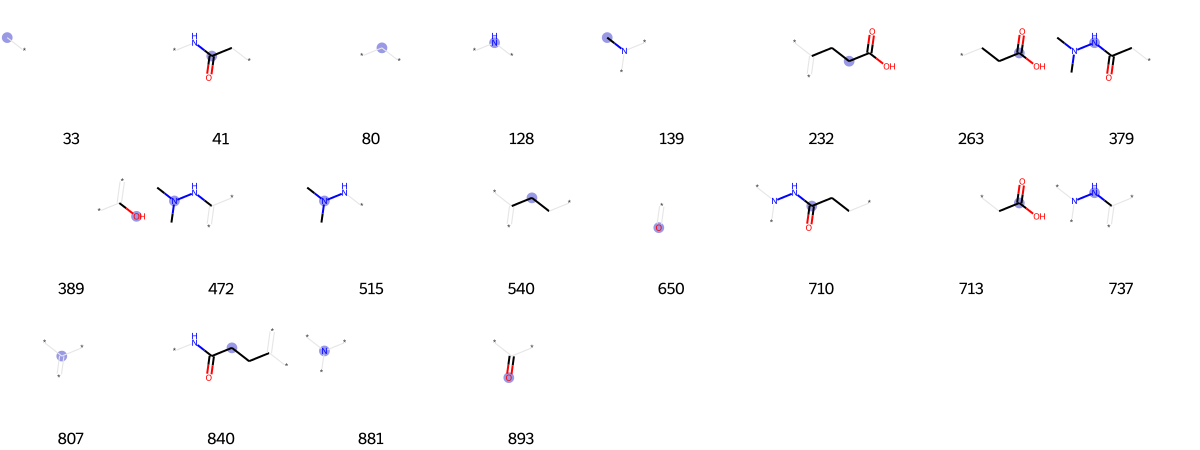

In [3347]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [3348]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 13,
 24,
 31,
 33,
 36,
 52,
 80,
 92,
 114,
 118,
 127,
 138,
 182,
 236,
 250,
 285,
 331,
 332,
 341,
 356,
 378,
 383,
 389,
 391,
 393,
 412,
 428,
 429,
 456,
 480,
 489,
 508,
 570,
 586,
 628,
 641,
 642,
 650,
 662,
 670,
 672,
 694,
 695,
 698,
 726,
 734,
 739,
 751,
 786,
 793,
 807,
 809,
 815,
 829,
 833,
 841,
 849,
 855,
 893,
 895,
 904,
 926,
 935,
 942,
 976,
 985,
 1005,
 1019]

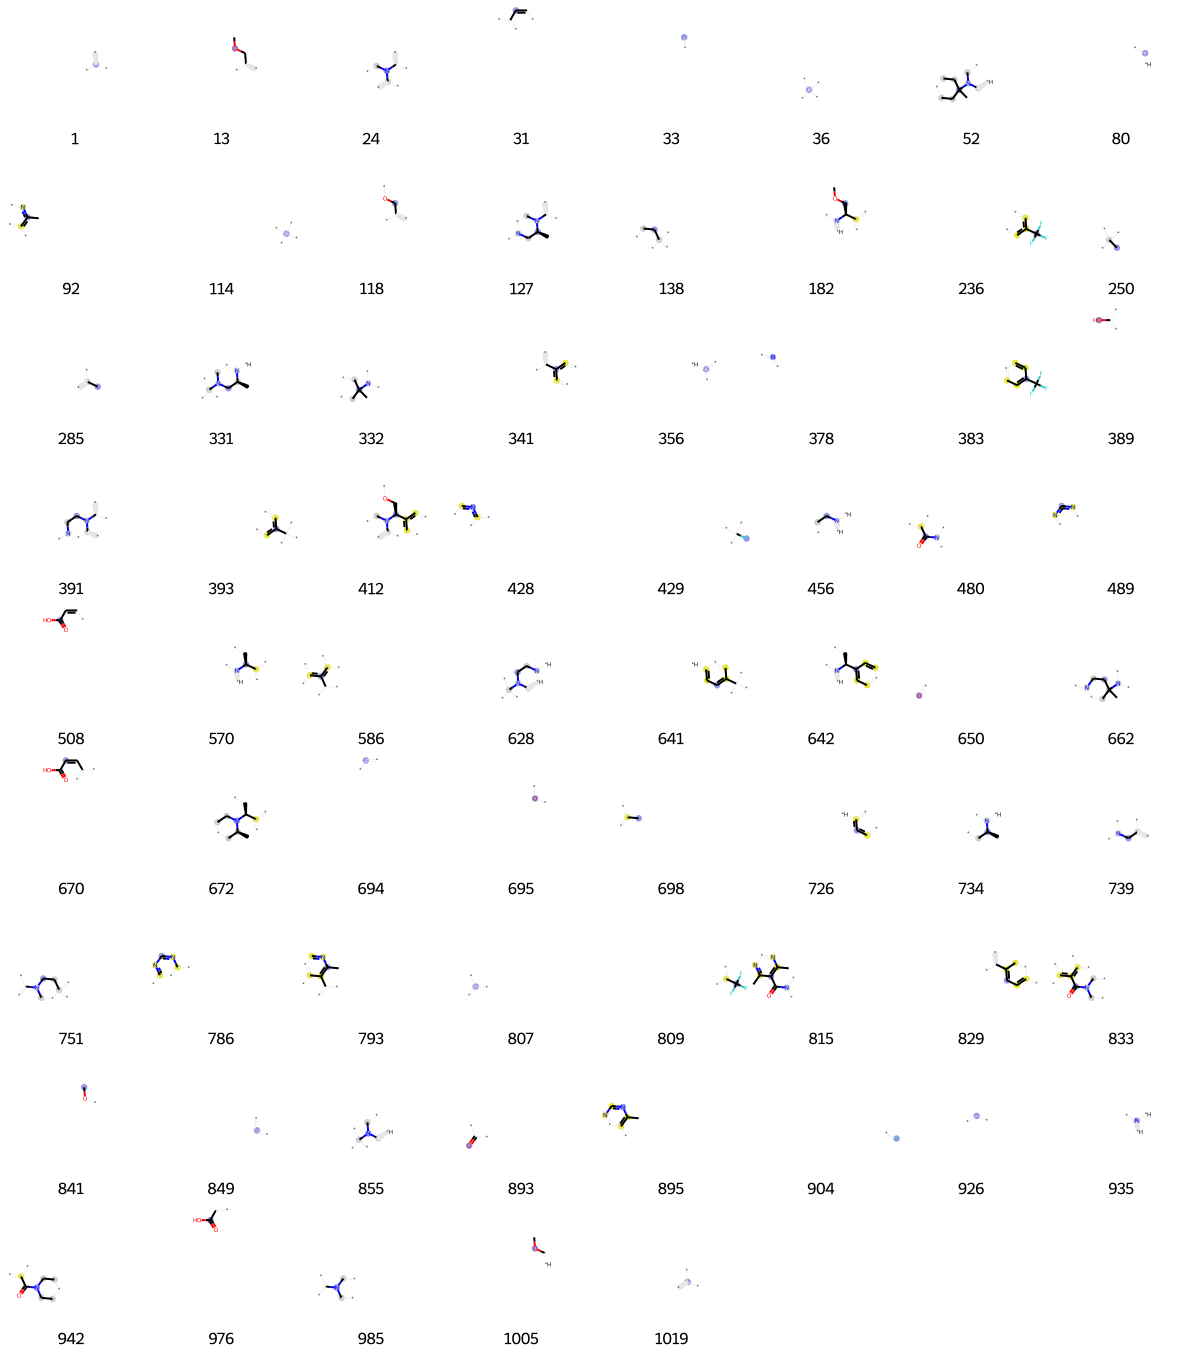

In [3349]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [3350]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 23,
 67,
 108,
 147,
 341,
 344,
 356,
 389,
 456,
 623,
 650,
 701,
 706,
 709,
 726,
 786,
 807,
 820,
 829,
 849,
 875,
 893,
 967,
 1022]

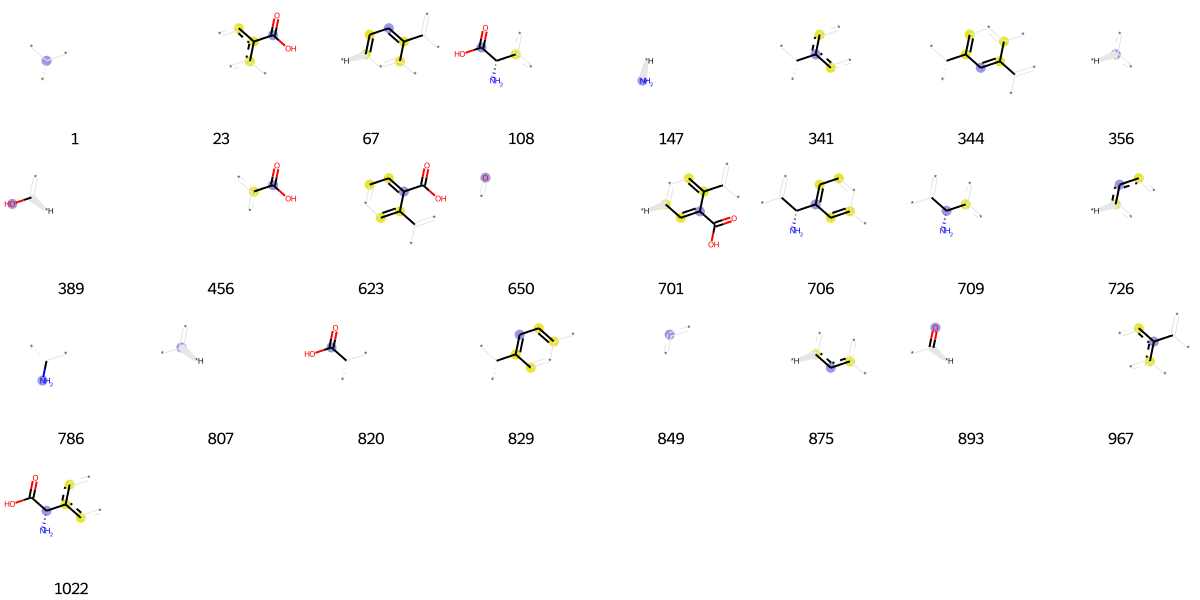

In [3351]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [3352]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[4,
 33,
 34,
 36,
 80,
 90,
 109,
 114,
 121,
 128,
 138,
 164,
 200,
 230,
 235,
 236,
 243,
 246,
 249,
 256,
 296,
 314,
 319,
 350,
 356,
 360,
 383,
 393,
 429,
 452,
 456,
 458,
 469,
 475,
 502,
 512,
 540,
 641,
 650,
 653,
 669,
 670,
 695,
 713,
 715,
 726,
 766,
 767,
 787,
 807,
 809,
 841,
 849,
 875,
 883,
 884,
 887,
 893,
 904,
 926,
 935,
 946,
 950,
 967,
 988,
 1003,
 1019]

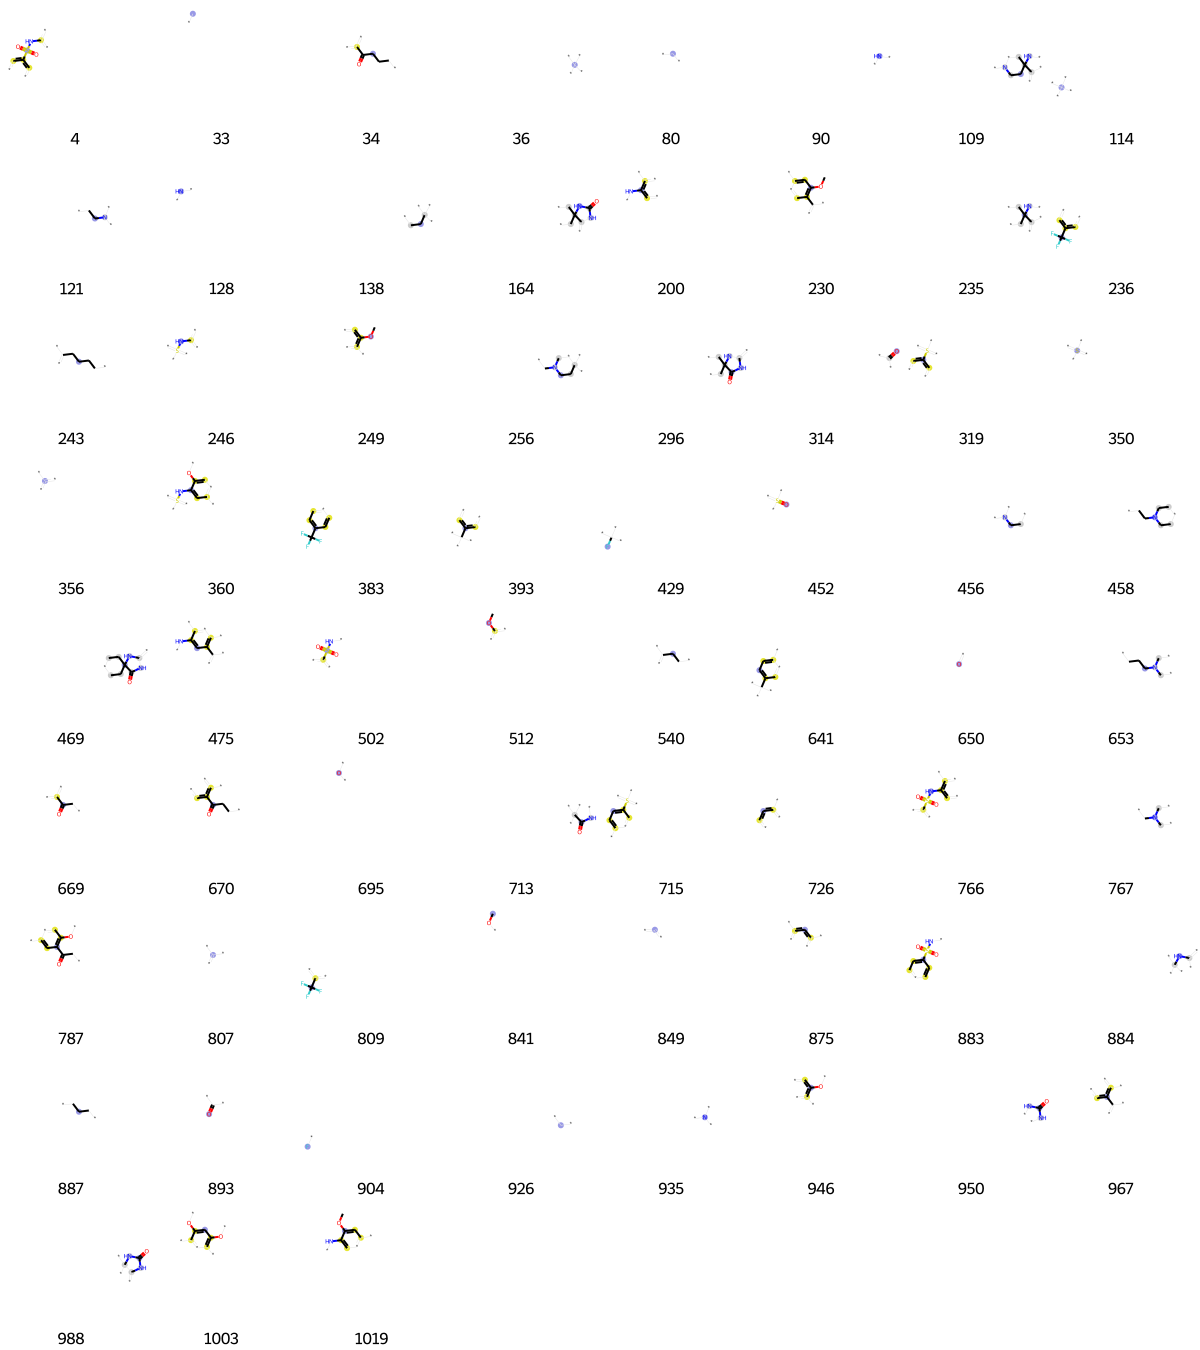

In [3353]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [3354]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[33,
 55,
 64,
 73,
 80,
 116,
 140,
 147,
 162,
 175,
 179,
 202,
 249,
 277,
 289,
 298,
 325,
 341,
 356,
 360,
 378,
 461,
 477,
 512,
 518,
 531,
 543,
 556,
 557,
 578,
 650,
 674,
 675,
 694,
 695,
 722,
 726,
 753,
 762,
 790,
 803,
 804,
 807,
 831,
 841,
 849,
 875,
 885,
 893,
 929,
 946,
 950,
 980,
 997,
 999,
 1000,
 1009]

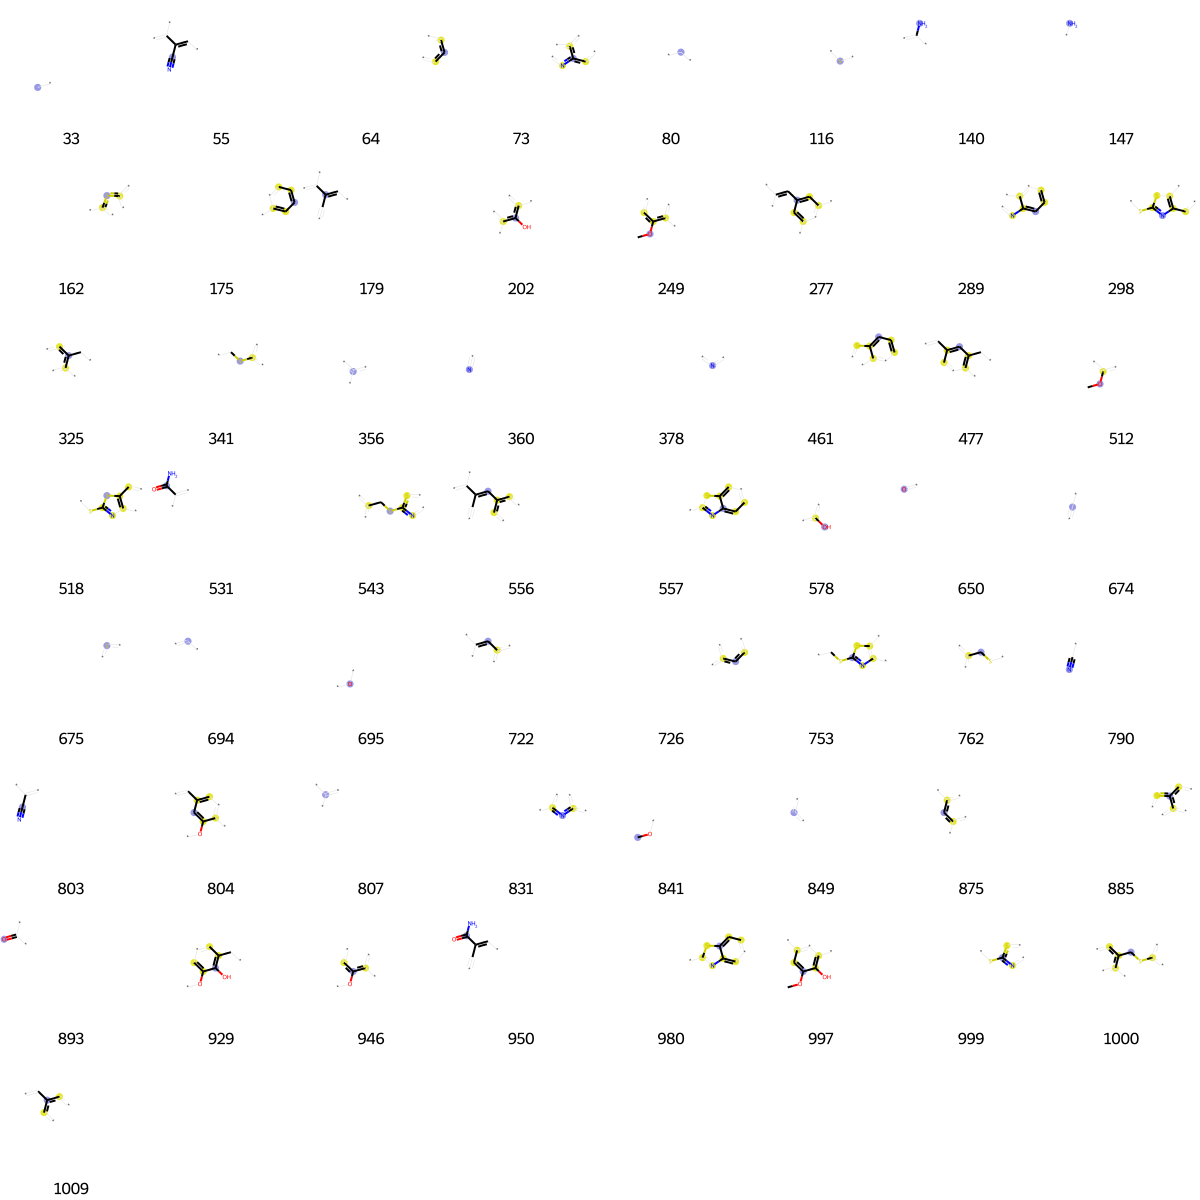

In [3355]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [3356]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[75,
 80,
 114,
 140,
 147,
 152,
 194,
 210,
 221,
 222,
 233,
 309,
 345,
 356,
 378,
 428,
 454,
 463,
 490,
 492,
 501,
 574,
 577,
 578,
 610,
 650,
 656,
 740,
 798,
 807,
 820,
 849,
 893,
 897,
 932,
 935,
 1019]

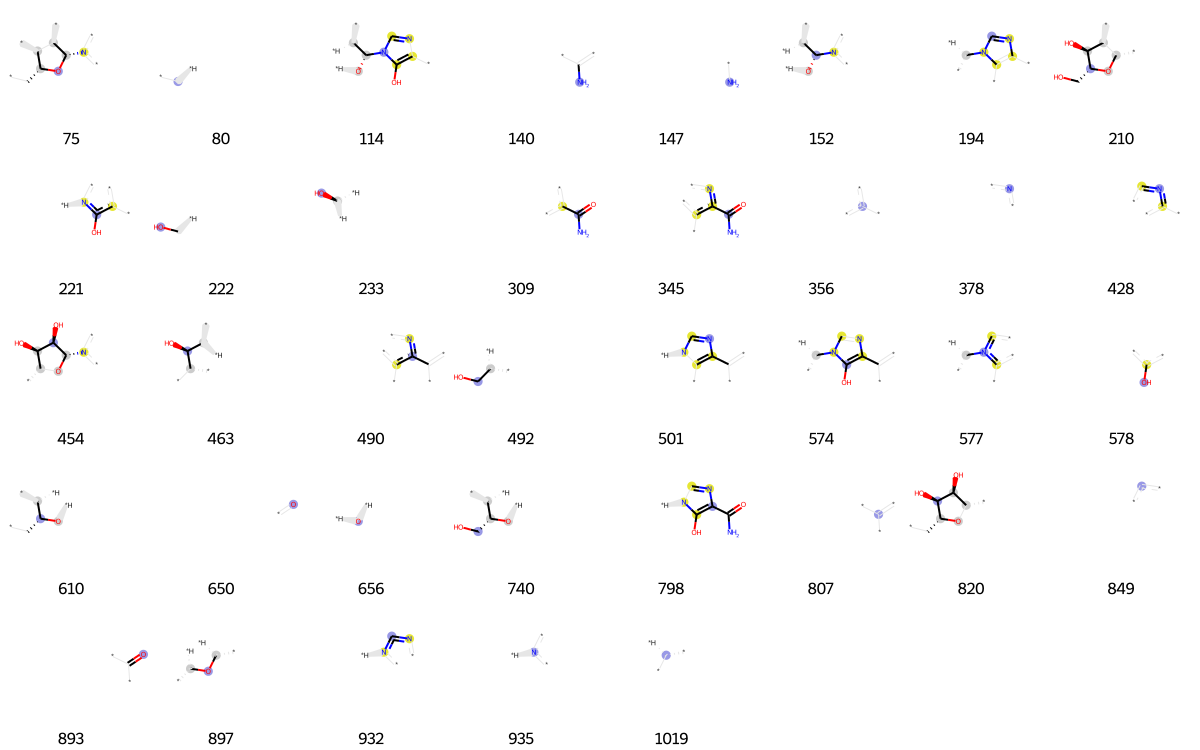

In [3357]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [3358]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 34,
 43,
 102,
 112,
 297,
 305,
 341,
 356,
 360,
 378,
 440,
 461,
 489,
 548,
 579,
 651,
 674,
 726,
 790,
 800,
 829,
 839,
 849,
 930,
 932,
 935]

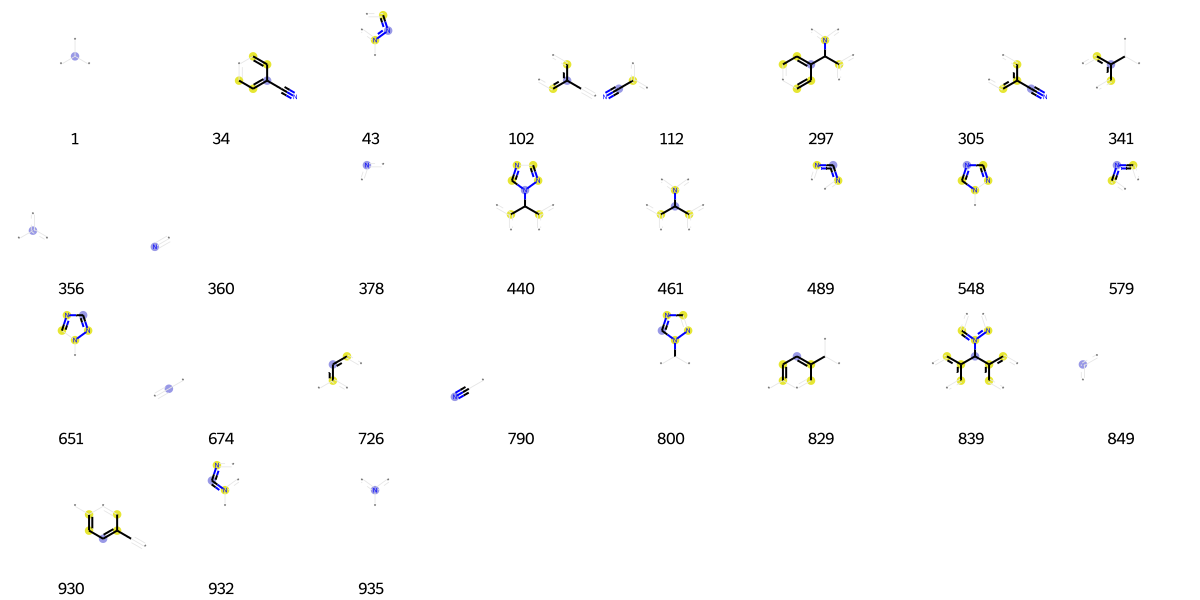

In [3359]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [3360]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33,
 34,
 42,
 45,
 80,
 90,
 119,
 134,
 294,
 314,
 356,
 366,
 530,
 561,
 583,
 597,
 647,
 650,
 657,
 659,
 721,
 758,
 802,
 849,
 850,
 875,
 935,
 987]

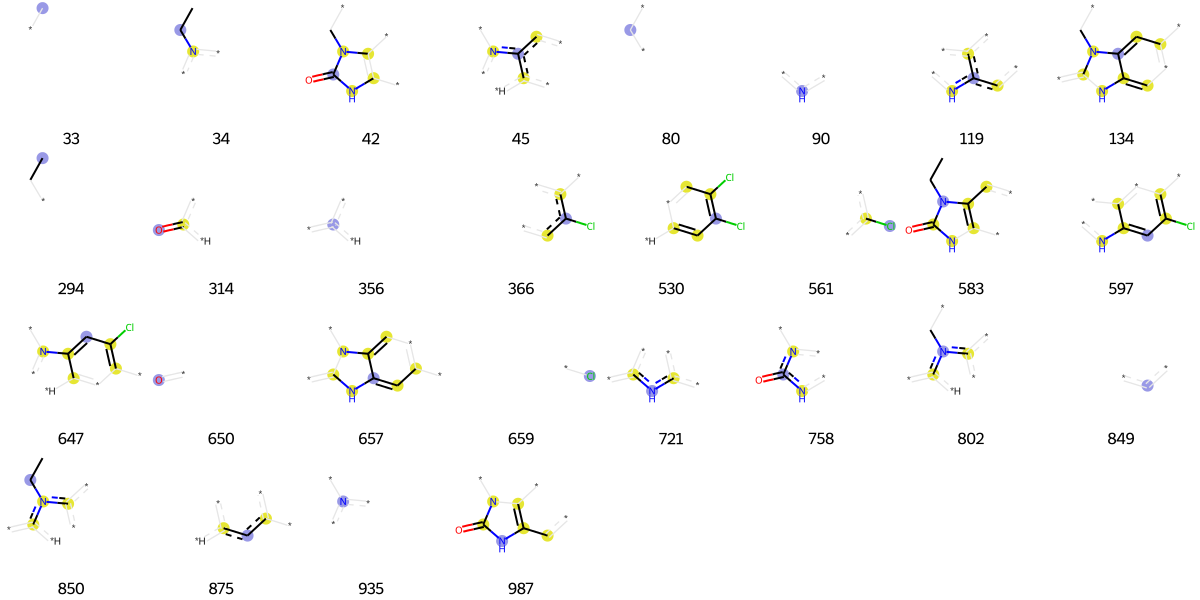

In [3361]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [3362]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 3,
 13,
 31,
 33,
 79,
 80,
 87,
 94,
 114,
 118,
 128,
 140,
 147,
 157,
 165,
 197,
 227,
 249,
 283,
 289,
 310,
 356,
 389,
 392,
 404,
 428,
 467,
 486,
 487,
 494,
 507,
 508,
 510,
 512,
 573,
 630,
 650,
 670,
 680,
 694,
 695,
 709,
 722,
 726,
 729,
 730,
 747,
 749,
 756,
 764,
 780,
 786,
 792,
 807,
 841,
 849,
 875,
 882,
 887,
 888,
 893,
 907,
 946,
 966,
 976,
 995,
 1005,
 1009]

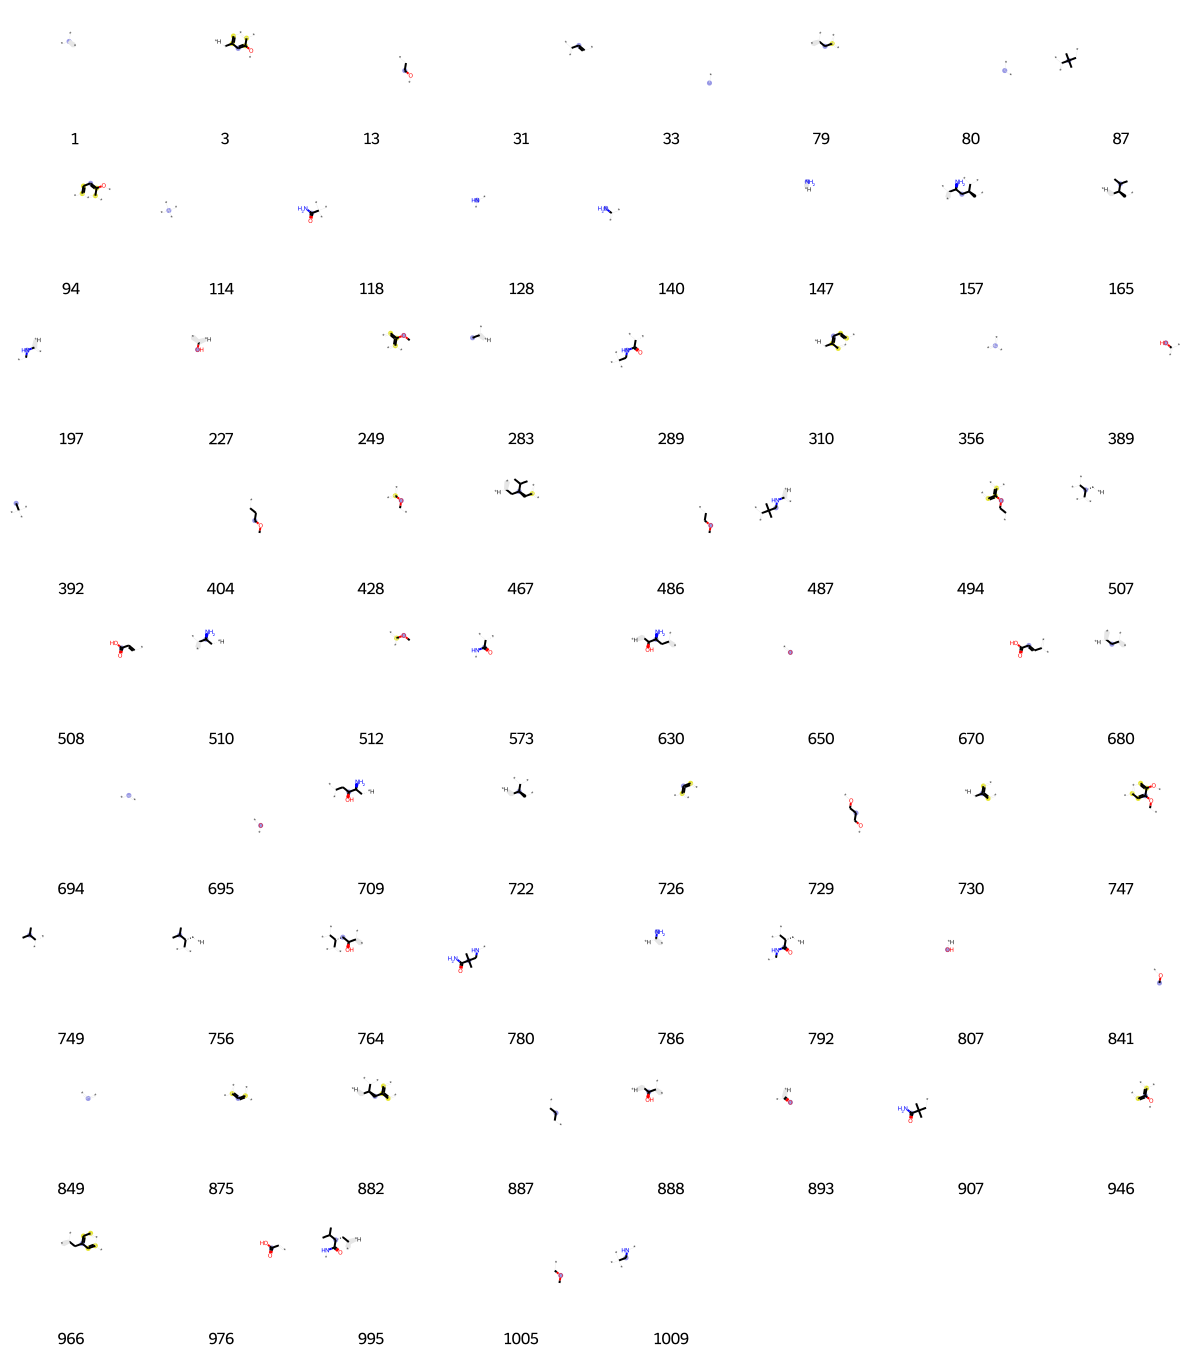

In [3363]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [3364]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 114,
 202,
 208,
 277,
 315,
 322,
 356,
 360,
 391,
 392,
 419,
 431,
 468,
 529,
 563,
 578,
 607,
 674,
 694,
 722,
 728,
 744,
 790,
 803,
 807,
 833,
 849,
 875,
 985,
 1000,
 1009]

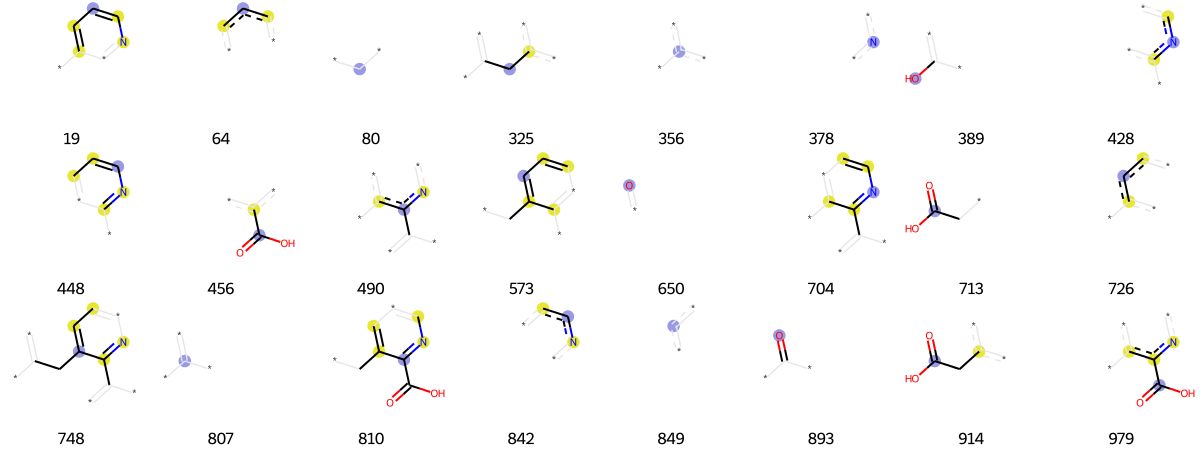

In [3365]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [3366]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[31, 33, 49, 128, 200, 396, 650, 690, 694, 695, 807, 841, 893]

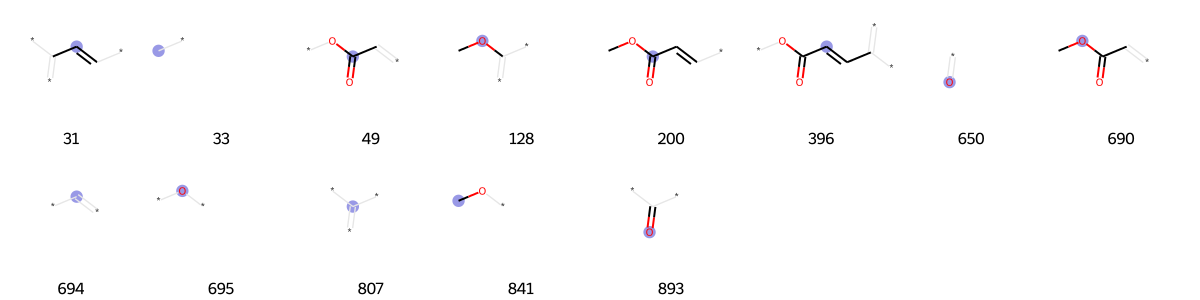

In [3367]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [3368]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 9,
 32,
 33,
 61,
 128,
 140,
 144,
 147,
 162,
 246,
 305,
 319,
 350,
 356,
 378,
 379,
 385,
 433,
 452,
 486,
 502,
 650,
 665,
 675,
 698,
 715,
 726,
 780,
 849,
 883,
 888]

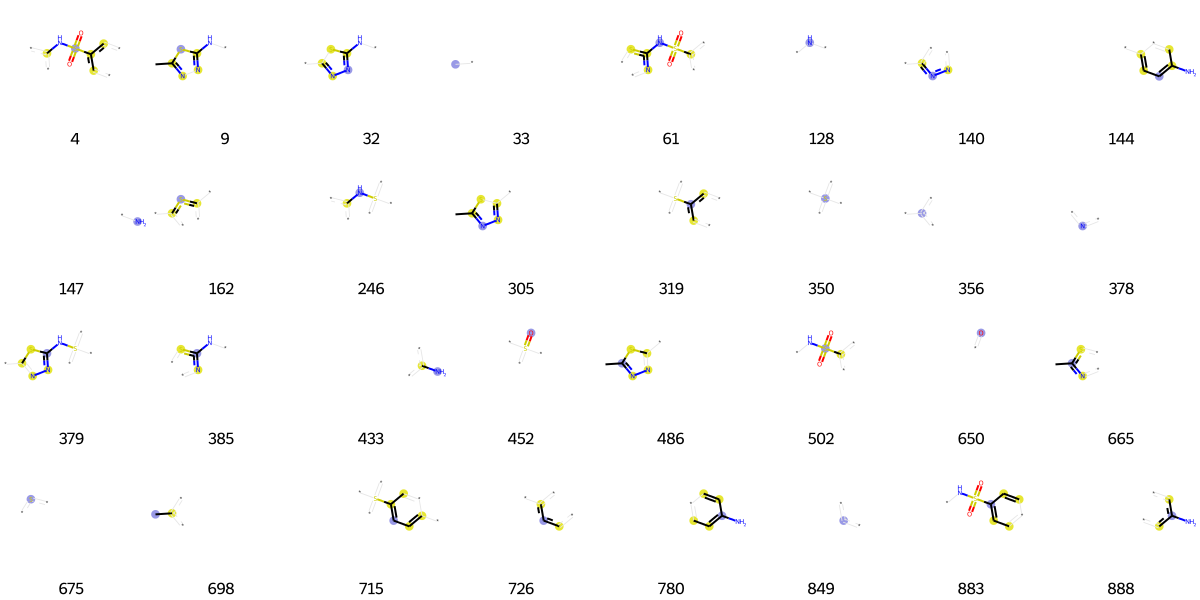

In [3369]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [3370]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[10,
 13,
 15,
 33,
 39,
 41,
 51,
 64,
 73,
 74,
 75,
 80,
 90,
 127,
 128,
 172,
 184,
 189,
 191,
 192,
 202,
 230,
 251,
 268,
 294,
 295,
 312,
 315,
 322,
 325,
 333,
 343,
 356,
 378,
 428,
 463,
 467,
 477,
 486,
 489,
 491,
 496,
 557,
 559,
 646,
 650,
 673,
 692,
 695,
 699,
 703,
 708,
 709,
 718,
 726,
 732,
 734,
 786,
 792,
 794,
 795,
 807,
 814,
 843,
 849,
 875,
 881,
 887,
 892,
 893,
 901,
 904,
 927,
 932,
 957,
 980]

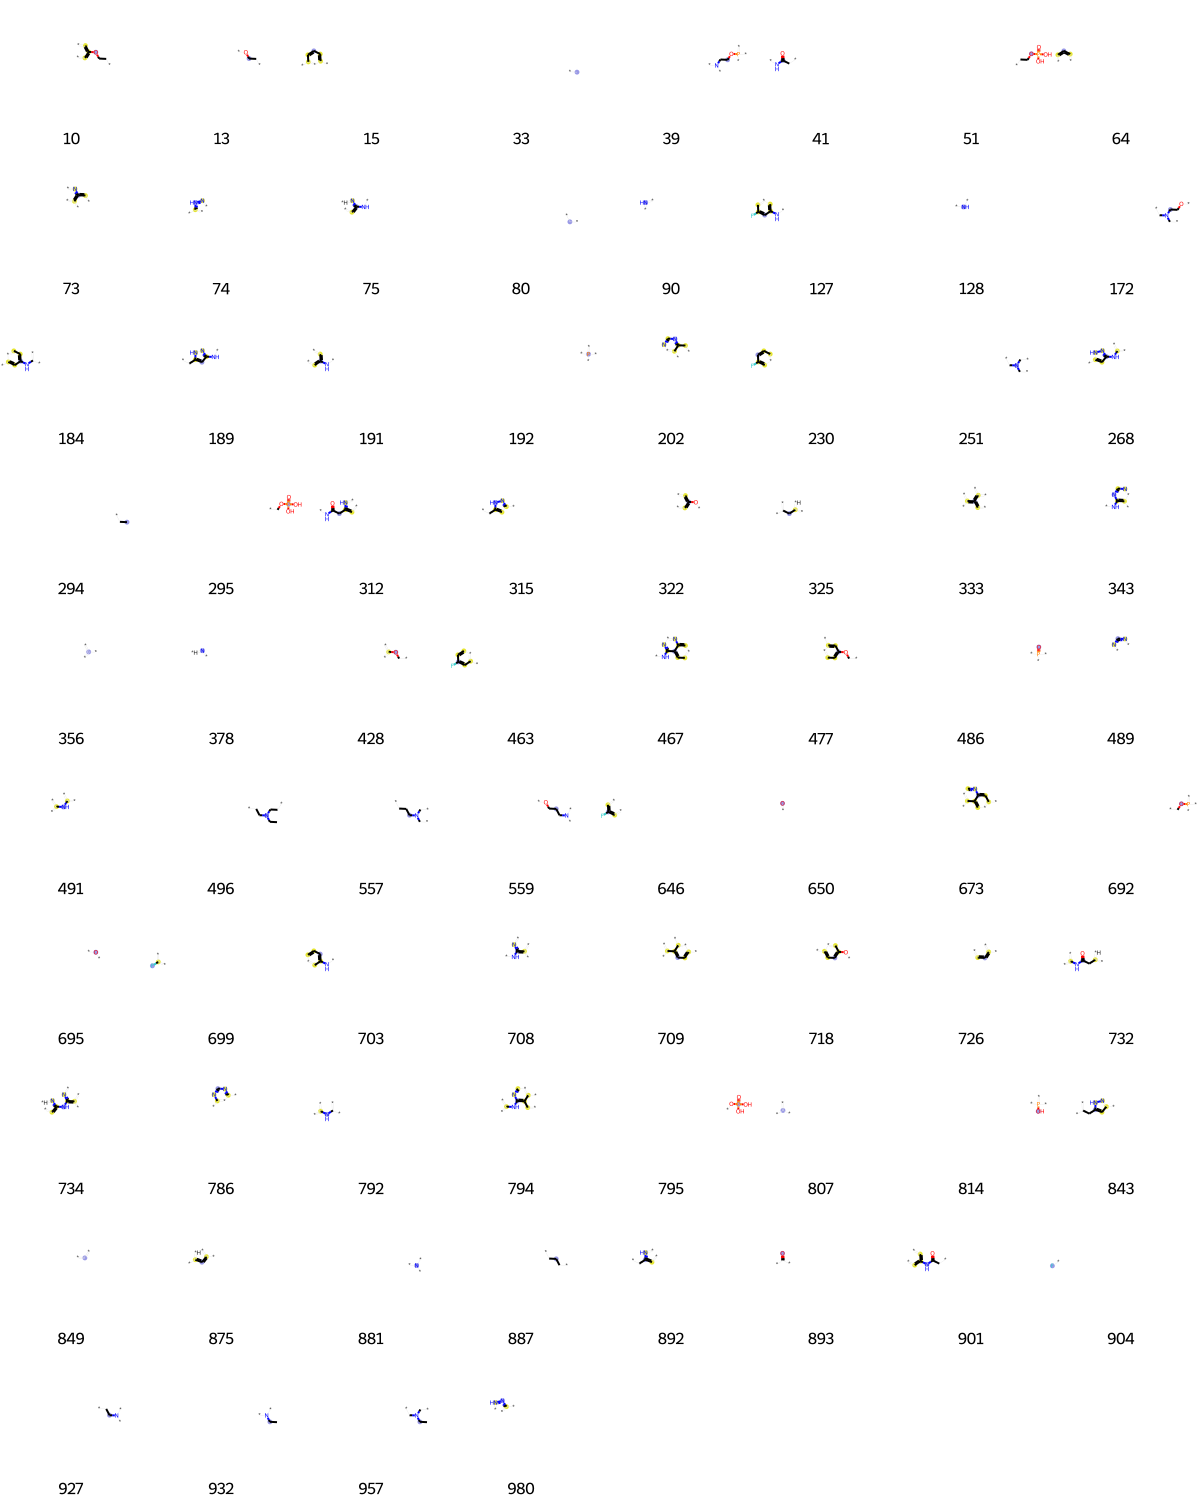

In [3371]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [3372]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 81,
 121,
 140,
 147,
 280,
 284,
 309,
 314,
 318,
 345,
 356,
 378,
 415,
 428,
 456,
 490,
 501,
 542,
 650,
 672,
 759,
 768,
 771,
 807,
 849,
 861,
 893,
 932,
 935,
 945]

In [3373]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[3,
 13,
 33,
 80,
 90,
 94,
 140,
 249,
 254,
 294,
 301,
 310,
 314,
 356,
 428,
 438,
 458,
 470,
 494,
 502,
 509,
 512,
 575,
 591,
 650,
 695,
 709,
 718,
 720,
 726,
 730,
 747,
 794,
 841,
 842,
 849,
 875,
 887,
 926,
 946,
 950,
 1019]

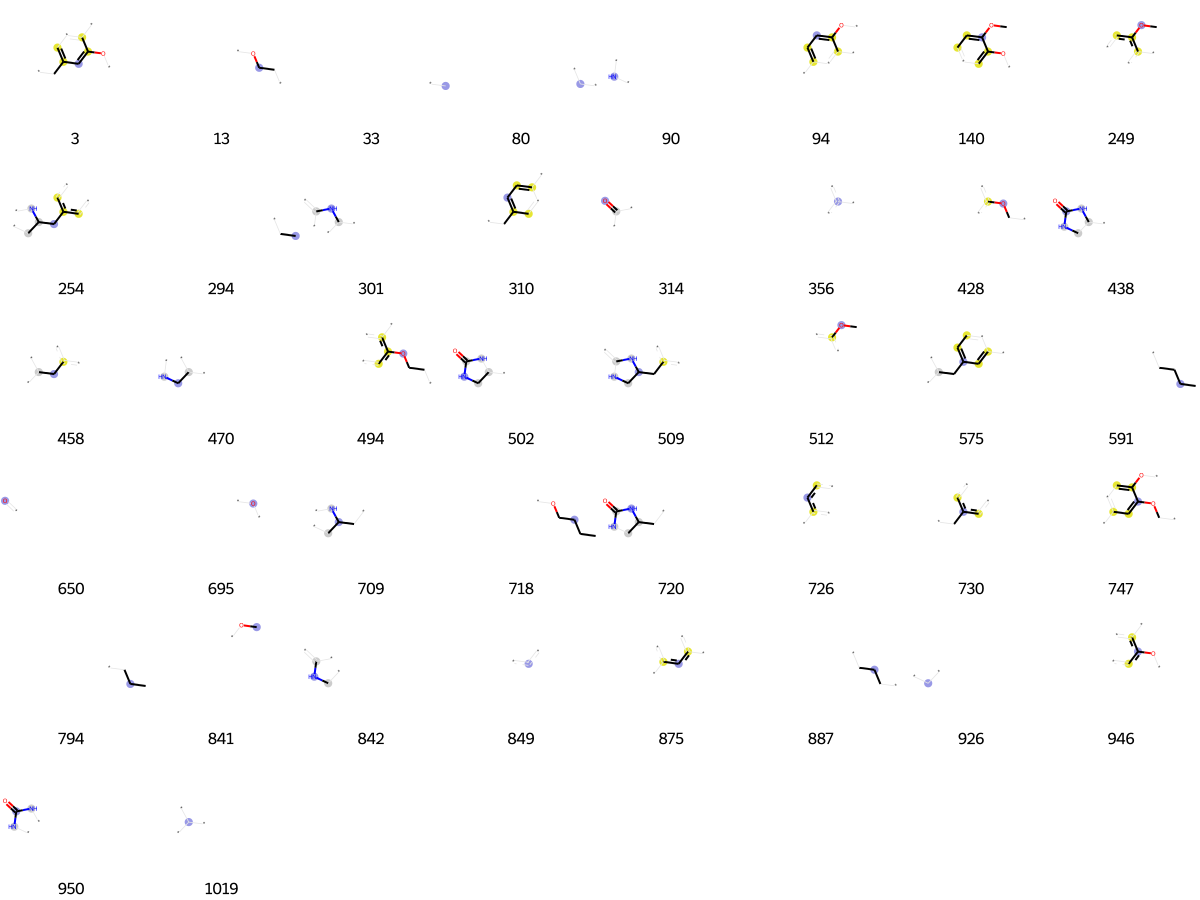

In [3374]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [3375]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[33,
 36,
 128,
 175,
 184,
 250,
 268,
 291,
 301,
 406,
 528,
 538,
 549,
 577,
 764,
 802,
 926,
 956,
 1019]

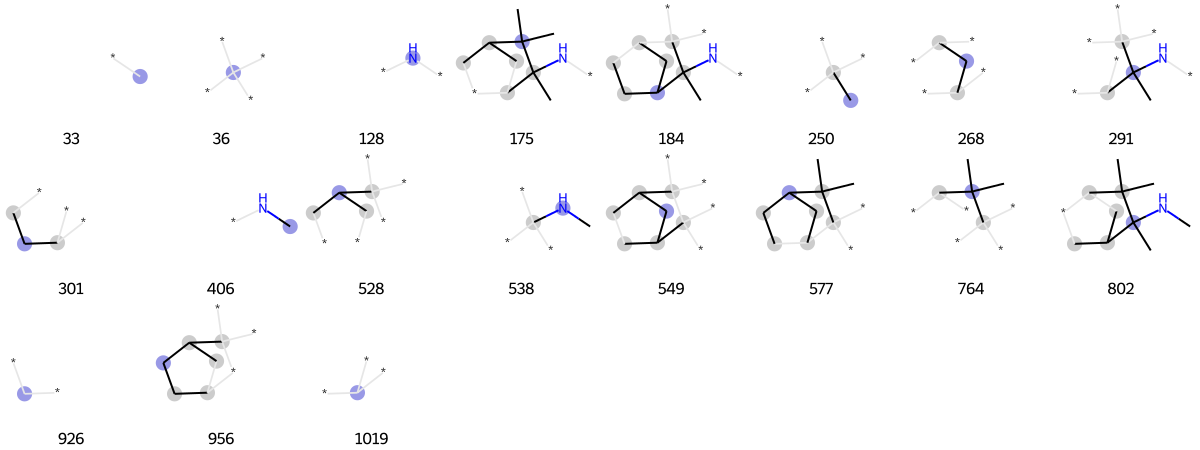

In [3376]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [3377]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 33,
 74,
 80,
 128,
 131,
 268,
 279,
 283,
 310,
 319,
 343,
 350,
 351,
 356,
 366,
 367,
 378,
 379,
 428,
 452,
 456,
 461,
 465,
 489,
 525,
 530,
 543,
 552,
 561,
 585,
 599,
 650,
 659,
 666,
 673,
 675,
 690,
 698,
 700,
 705,
 708,
 715,
 726,
 731,
 757,
 767,
 786,
 800,
 803,
 849,
 875,
 898,
 909,
 926,
 935,
 994]

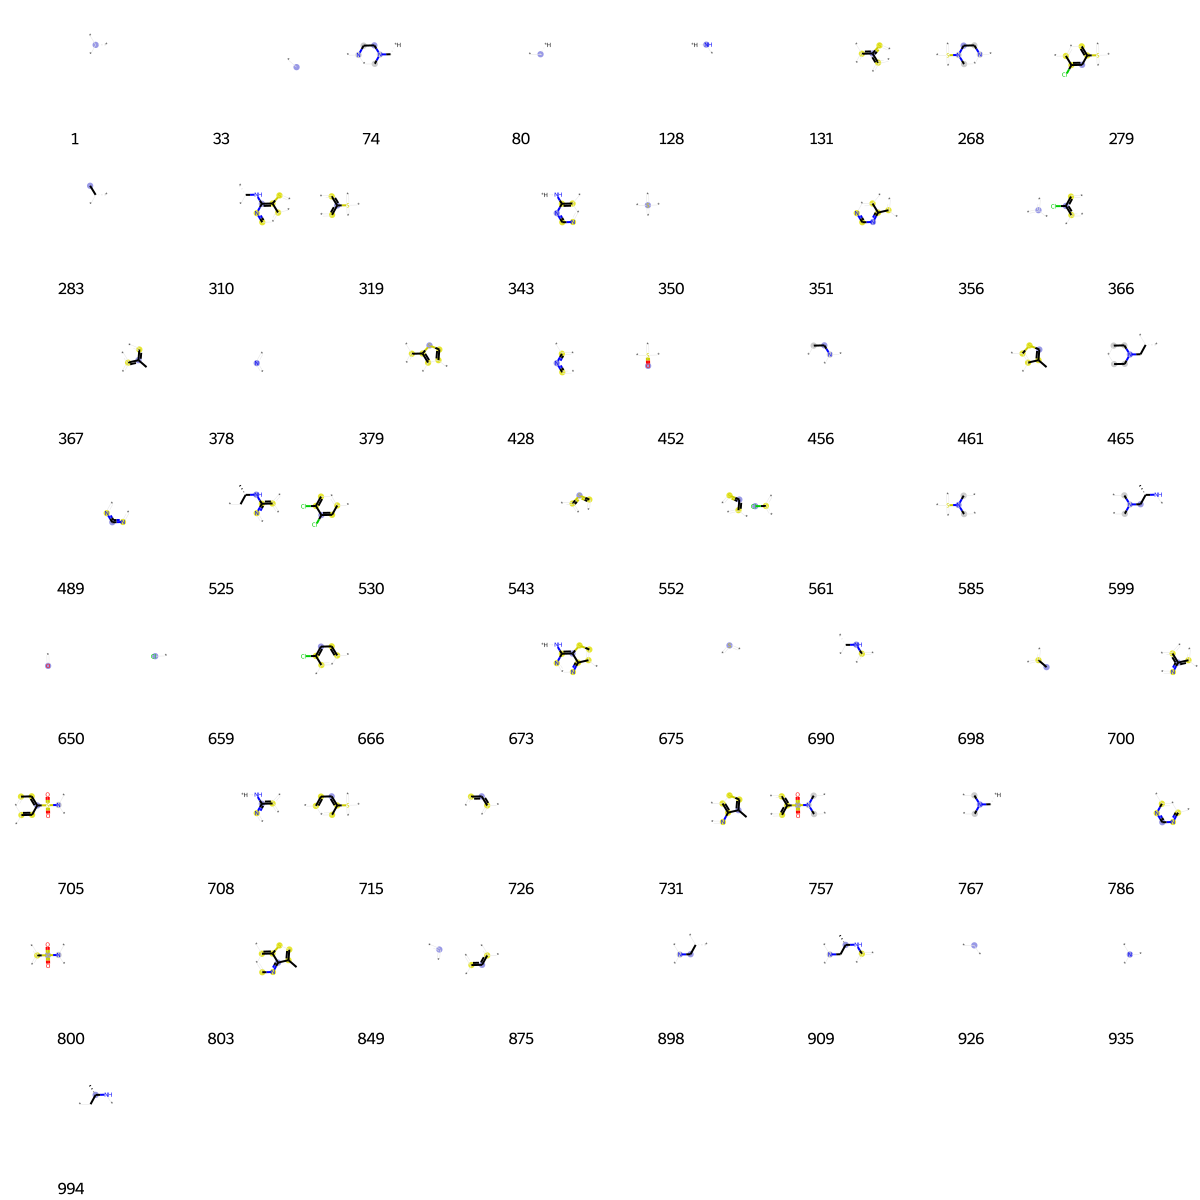

In [3378]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [3379]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[13,
 33,
 41,
 54,
 64,
 73,
 80,
 104,
 118,
 126,
 133,
 136,
 177,
 210,
 222,
 233,
 270,
 285,
 299,
 314,
 322,
 333,
 356,
 424,
 433,
 443,
 463,
 473,
 479,
 489,
 492,
 512,
 524,
 525,
 550,
 558,
 578,
 580,
 583,
 610,
 623,
 650,
 656,
 694,
 695,
 696,
 707,
 718,
 722,
 726,
 740,
 772,
 781,
 807,
 820,
 831,
 841,
 849,
 875,
 896,
 897,
 942,
 946,
 953,
 960,
 1004,
 1010,
 1017,
 1019]

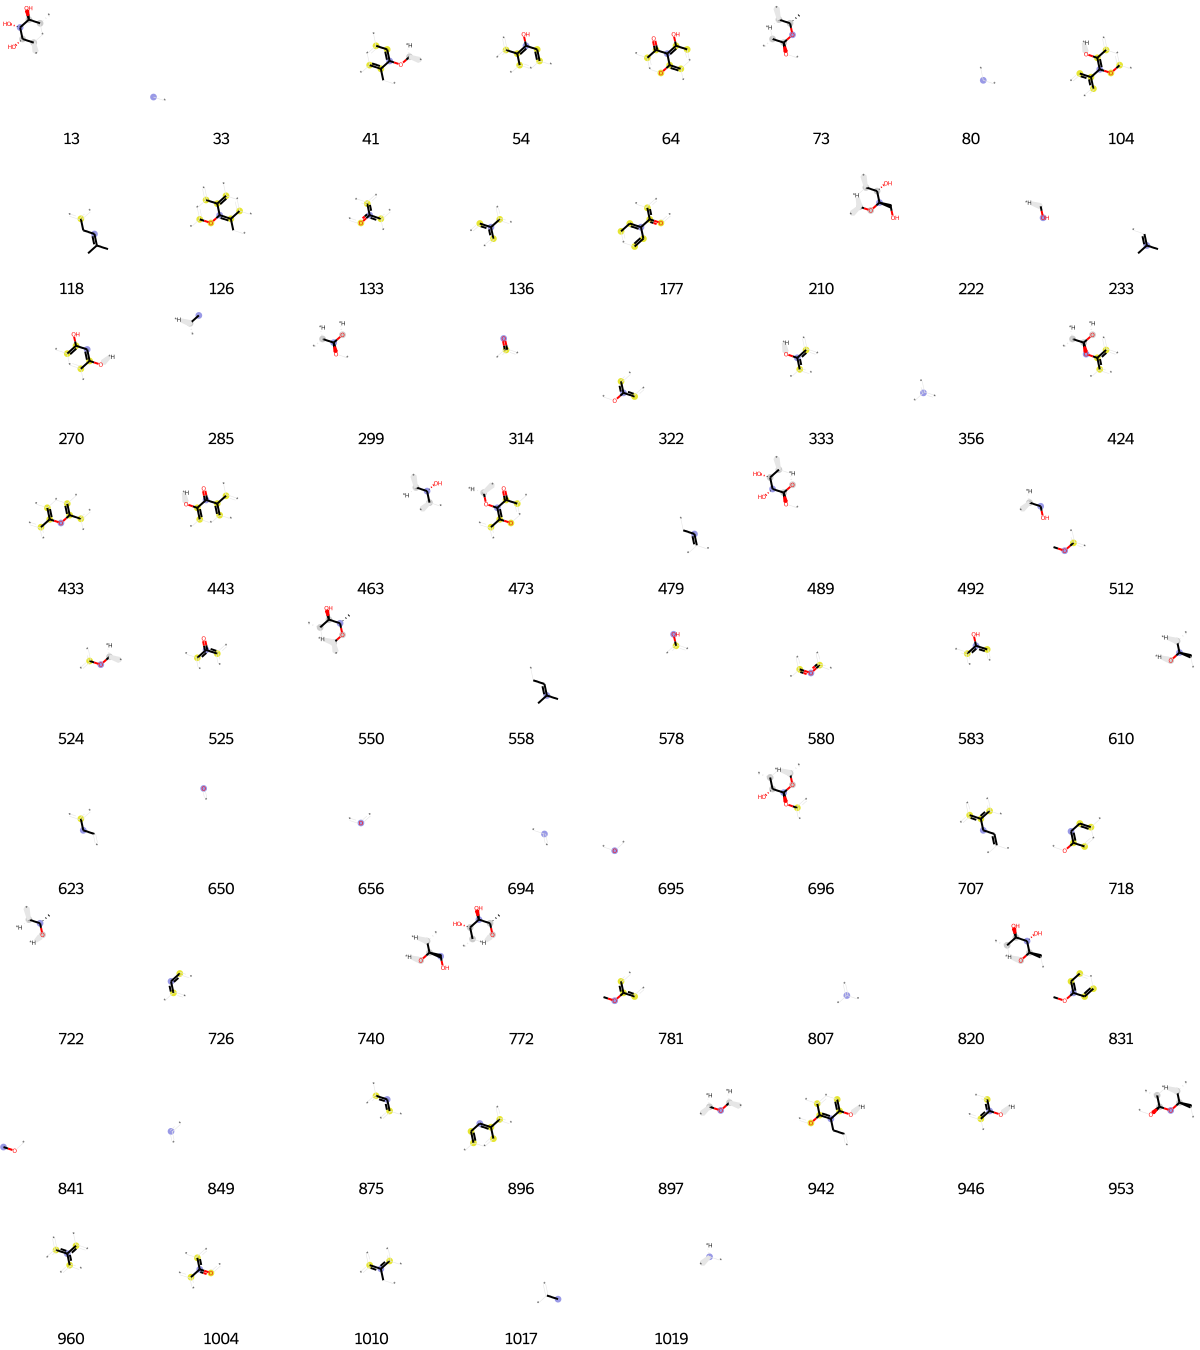

In [3380]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [3381]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[10,
 13,
 33,
 36,
 46,
 80,
 102,
 119,
 147,
 200,
 214,
 216,
 225,
 270,
 294,
 322,
 356,
 428,
 507,
 534,
 561,
 618,
 619,
 650,
 656,
 659,
 695,
 698,
 718,
 726,
 795,
 807,
 816,
 833,
 849,
 880,
 887,
 893,
 926,
 980,
 1017]

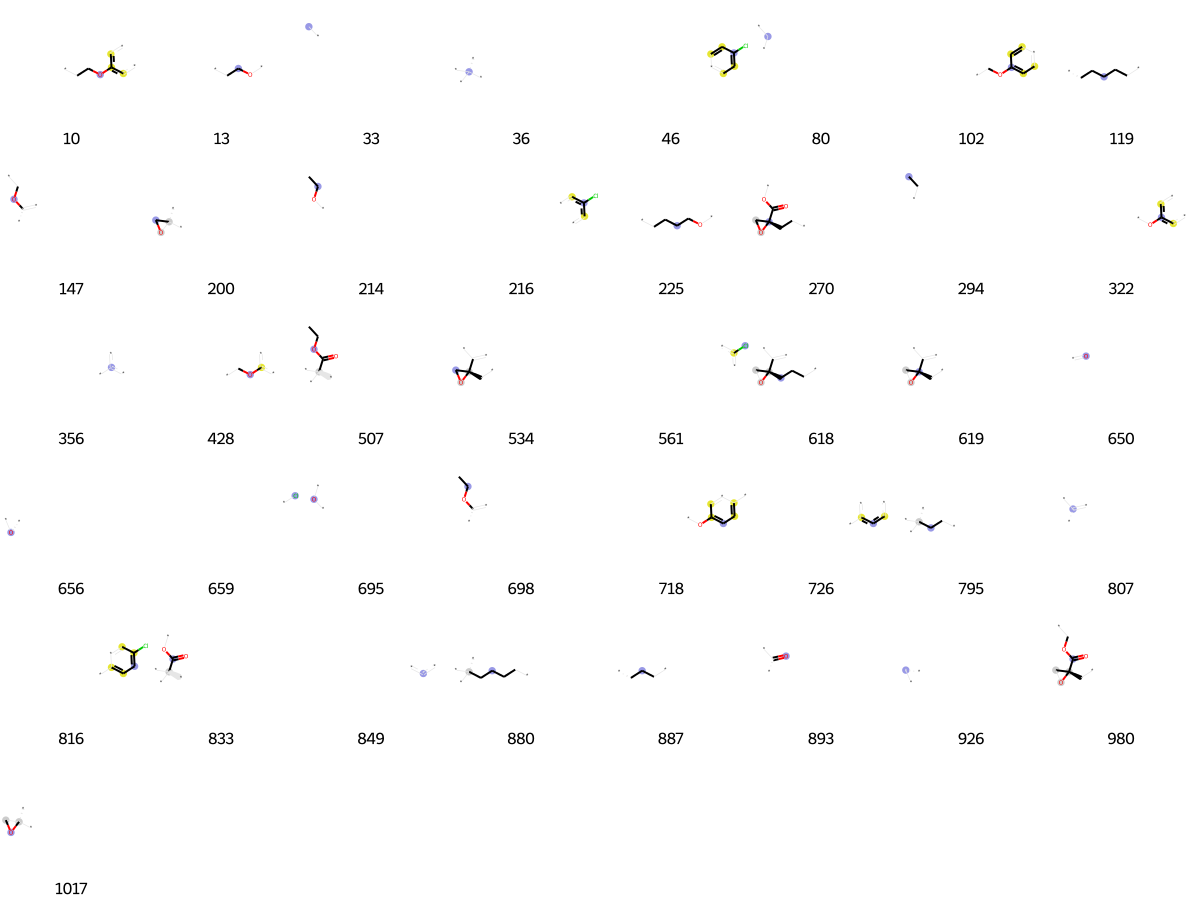

In [3382]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [3383]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 36,
 80,
 119,
 128,
 169,
 262,
 268,
 288,
 319,
 336,
 414,
 422,
 436,
 488,
 502,
 550,
 592,
 628,
 667,
 675,
 679,
 703,
 771,
 887,
 913,
 926,
 952,
 1004,
 1019]

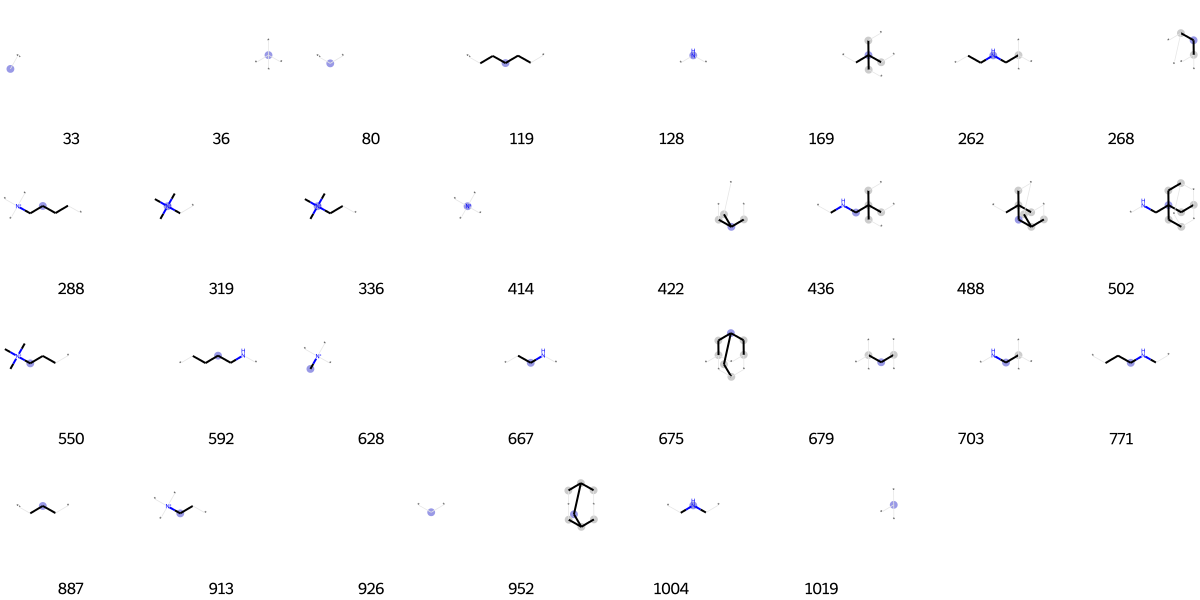

In [3384]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [3385]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[4,
 268,
 301,
 325,
 350,
 356,
 452,
 456,
 500,
 544,
 585,
 592,
 650,
 665,
 739,
 755,
 790,
 807,
 817,
 830,
 851,
 882,
 890,
 926,
 935,
 974,
 1019]

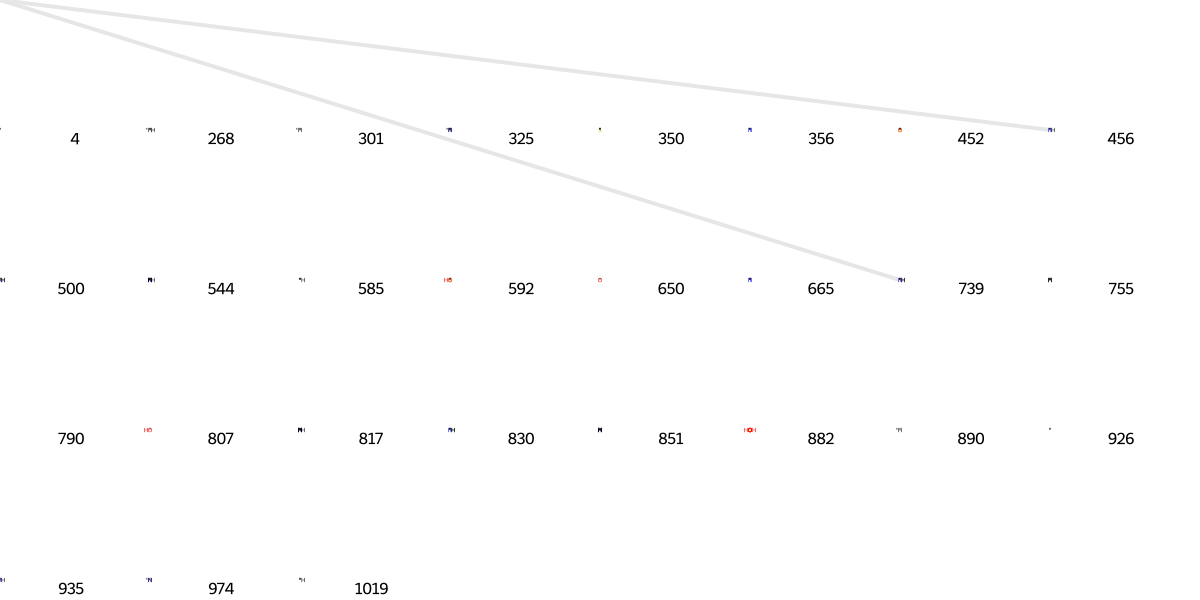

In [3386]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])